In [10]:
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import energyflow as ef
from energyflow.archs import PFN
from energyflow.datasets import qg_jets
from energyflow.utils import data_split, remap_pids, to_categorical
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.utils import shuffle
import math
import sklearn

Using TensorFlow backend.
/home/jerry/anaconda3/envs/shared_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jerry/anaconda3/envs/shared_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jerry/anaconda3/envs/shared_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jerry

In [11]:
import tensorflow as tf

# Data analysis

In [3]:
"""
Load Data
"""
X_sig_path = "training_data/X_sig.npy"
y_sig_path = "training_data/y_sig.npy"
X_sb_path = "training_data/X_sb.npy"
y_sb_path = "training_data/y_sb.npy"
X_bgsig_path = "training_data/X_bgsig.npy"
y_bgsig_path = "training_data/y_bgsig.npy"
X_sig = np.load(X_sig_path)
y_sig = np.load(y_sig_path)
X_sb = np.load(X_sb_path)
y_sb = np.load(y_sb_path)
X_bgsig = np.load(X_bgsig_path)
y_bgsig = np.load(y_bgsig_path)

In [4]:
sig_nonzeros = np.count_nonzero(np.sum(X_sig,axis=2),axis=1)
sb_nonzeros = np.count_nonzero(np.sum(X_sb,axis=2),axis=1)
bgsig_nonzeros = np.count_nonzero(np.sum(X_bgsig,axis=2),axis=1)

In [5]:
sig_nonzeros, sb_nonzeros, bgsig_nonzeros

(array([ 80, 123,  73, ...,  81, 102,  55]),
 array([108, 111,  49, ..., 105,  92,  55]),
 array([100,  66,  68, ...,  88,  44,  63]))

In [8]:
X_train, X_val, X_test, Y_train,Y_val,Y_test = prep_and_shufflesplit_data(1)

Size of sb:
(76000, 282, 4)
Size of bgsig:
(0, 282, 4)
Size of sig:
(76000, 282, 4)
Training set size, distribution:
(121600, 282, 4)
(array([0., 1.]), array([60705, 60895]))
Validations set size, distribution:
(30400, 282, 4)
(array([0., 1.]), array([15295, 15105]))
Test set size, distribution:
(10000, 282, 4)
(array([0., 1.]), array([5000, 5000]))


In [9]:
X_sig.shape

(98391, 282, 4)

In [10]:
X_bgsig.shape

(83475, 282, 4)

In [11]:
np.count_nonzero(X_sig[0][:,0])

80

In [15]:
def convert_to_scatter_points(orig_data, idx):
    dest = []
    for pt in orig_data:
        to_plot = pt[:,idx]
        num = np.count_nonzero(to_plot)
        avg = sum(to_plot)/num
        dest.append([num, avg])
    return dest

In [17]:
sig_points_0 = convert_to_scatter_points(X_sig, 0)
sig_points_1 = convert_to_scatter_points(X_sig, 1)
sig_points_2 = convert_to_scatter_points(X_sig, 2)
sig_points_3 = convert_to_scatter_points(X_sig, 3)
bg_points_0 = convert_to_scatter_points(X_bgsig, 0)
bg_points_1 = convert_to_scatter_points(X_bgsig, 1)
bg_points_2 = convert_to_scatter_points(X_bgsig, 2)
bg_points_3 = convert_to_scatter_points(X_bgsig, 3)
    

In [20]:
sig_points_0 = np.array(sig_points_0)
sig_points_1 = np.array(sig_points_1)
sig_points_2 = np.array(sig_points_2)
sig_points_3 = np.array(sig_points_3)
bg_points_0 = np.array(bg_points_0)
bg_points_1 = np.array(bg_points_1)
bg_points_2 = np.array(bg_points_2)
bg_points_3 = np.array(bg_points_3)

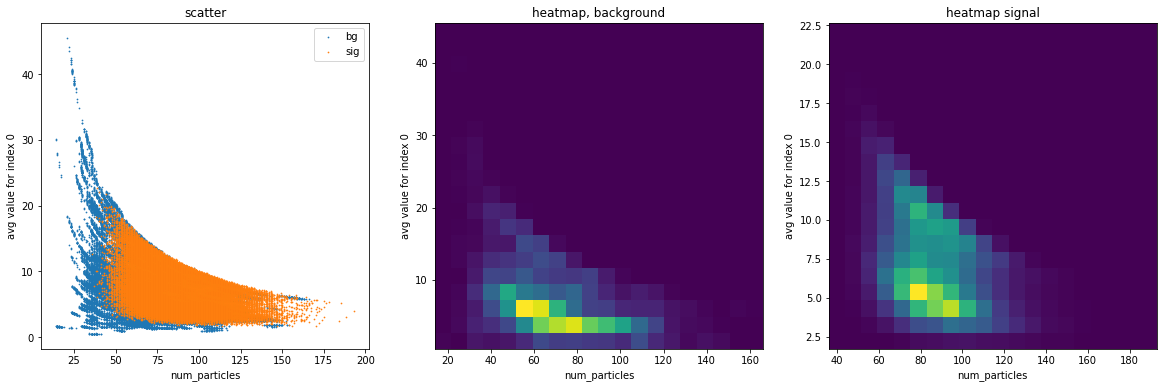

In [40]:

%matplotlib inline
fig = plt.figure(figsize=(20, 6))
subplots = fig.subplots(1, 3)
ax0, ax1, ax2 = subplots[0], subplots[1], subplots[2]
[ax.set_xlabel('num_particles') for ax in subplots]
[ax.set_ylabel('avg value for index 0') for ax in subplots]
ax0.set_title('scatter')
ax1.set_title('heatmap, background')
ax2.set_title('heatmap signal')
ax0.scatter(*zip(*bg_points_0),s = 2,marker = '.',label = 'bg')
ax0.scatter(*zip(*sig_points_0),s = 2, marker = '.',label = 'sig')
ax0.legend()
ax1.hist2d(*zip(*bg_points_0),bins=20)
ax2.hist2d(*zip(*sig_points_0),bins=20)
None

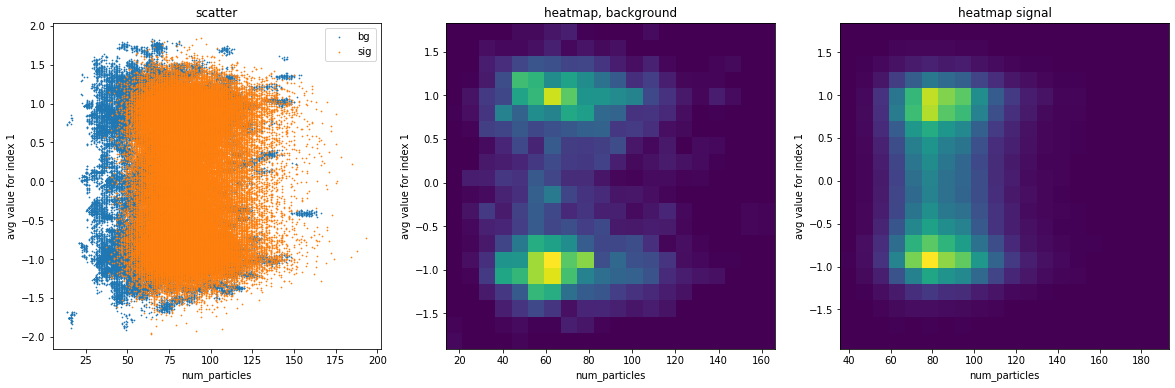

In [41]:

%matplotlib inline
fig = plt.figure(figsize=(20, 6))
subplots = fig.subplots(1, 3)
ax0, ax1, ax2 = subplots[0], subplots[1], subplots[2]
[ax.set_xlabel('num_particles') for ax in subplots]
[ax.set_ylabel('avg value for index 1') for ax in subplots]

ax0.set_title('scatter')
ax1.set_title('heatmap, background')
ax2.set_title('heatmap signal')
ax0.scatter(*zip(*bg_points_1),s = 2,marker = '.',label = 'bg')
ax0.scatter(*zip(*sig_points_1),s = 2, marker = '.',label = 'sig')
ax0.legend()
ax1.hist2d(*zip(*bg_points_1),bins=20)
ax2.hist2d(*zip(*sig_points_1),bins=20)
None


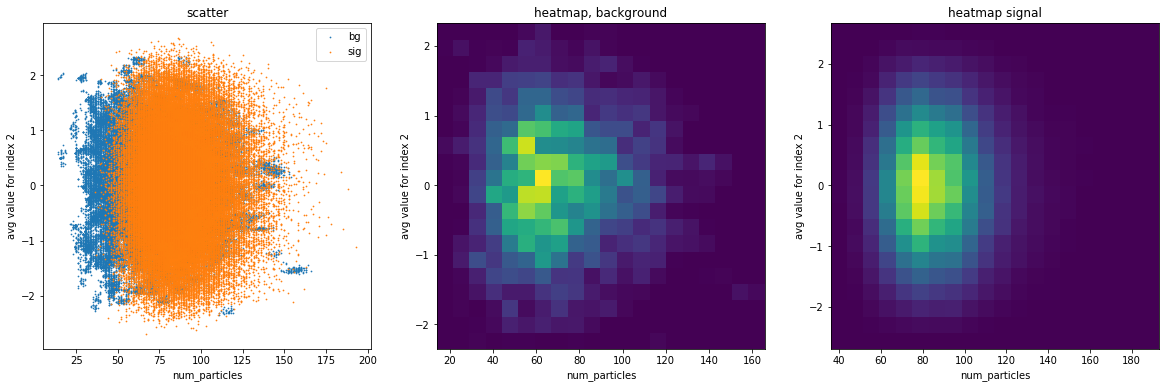

In [42]:
%matplotlib inline
fig = plt.figure(figsize=(20, 6))
subplots = fig.subplots(1, 3)
ax0, ax1, ax2 = subplots[0], subplots[1], subplots[2]
[ax.set_xlabel('num_particles') for ax in subplots]
[ax.set_ylabel('avg value for index 2') for ax in subplots]

ax0.set_title('scatter')
ax1.set_title('heatmap, background')
ax2.set_title('heatmap signal')
ax0.scatter(*zip(*bg_points_2),s = 2,marker = '.',label = 'bg')
ax0.scatter(*zip(*sig_points_2),s = 2, marker = '.',label = 'sig')
ax0.legend()
ax1.hist2d(*zip(*bg_points_2),bins=20)
ax2.hist2d(*zip(*sig_points_2),bins=20)
None

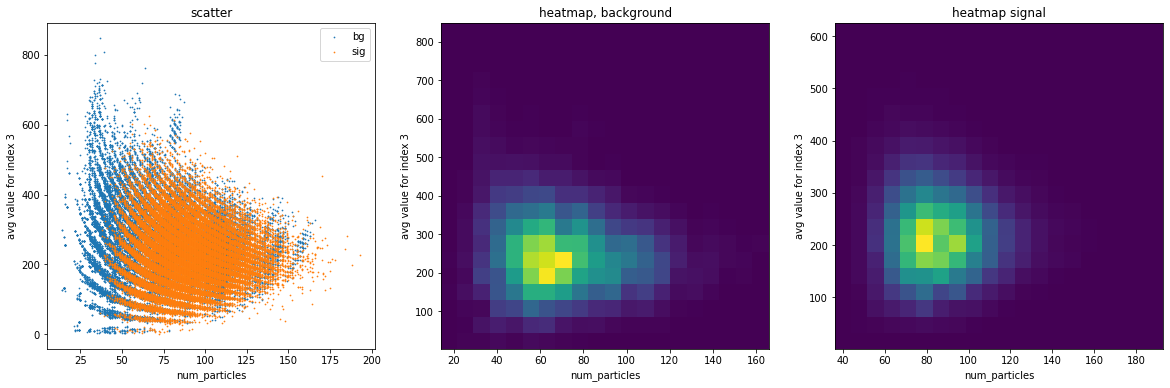

In [43]:
%matplotlib inline
fig = plt.figure(figsize=(20, 6))
subplots = fig.subplots(1, 3)
ax0, ax1, ax2 = subplots[0], subplots[1], subplots[2]
[ax.set_xlabel('num_particles') for ax in subplots]
[ax.set_ylabel('avg value for index 3') for ax in subplots]

ax0.set_title('scatter')
ax1.set_title('heatmap, background')
ax2.set_title('heatmap signal')
ax0.scatter(*zip(*bg_points_3),s = 2,marker = '.',label = 'bg')
ax0.scatter(*zip(*sig_points_3),s = 2, marker = '.',label = 'sig')
ax0.legend()
ax1.hist2d(*zip(*bg_points_3),bins=20)
ax2.hist2d(*zip(*sig_points_3),bins=20)
None

# Leftover code from previously

In [6]:
def prep_and_shufflesplit_data_modified(anomaly_ratio, size_each = 76000, shuffle_seed = 69,
                               train = 0.8, val = 0.2, test_size_each = 5000, special_test = True,
                               use_pid = True, limit_particles = 9999, normalize_all = True):
    
    """
    Pre-Data Selection
    """
        
    #how much bg and signal data to take?
    
    anom_size = round(anomaly_ratio * size_each)
    bgsig_size = size_each - anom_size
    
    # make sure we have enough data.
    assert (size_each <= X_sb.shape[0])
    assert (anom_size + test_size_each <= X_sig.shape[0])
    assert (bgsig_size + test_size_each <= X_bgsig.shape[0])
    
    """
    Data Selection
    """
    
    # select sideband datapoints
    this_X_sb = X_sb[:size_each]
    this_y_sb = np.zeros(size_each)
    
    # select bgsig datapoints
    this_X_bgsig = X_bgsig[:bgsig_size]
    this_y_bgsig = np.ones(bgsig_size)
    
    # select anomaly datapoints
    this_X_sig = X_sig[:anom_size]
    this_y_sig = np.ones(anom_size)
    
    """
    Shuffle + Train-Val-Test Split (not test set)
    """
    # Combine all 3 data sets
    this_X = np.concatenate([this_X_sb, this_X_bgsig, this_X_sig])
    this_y = np.concatenate([this_y_sb, this_y_bgsig, this_y_sig])
    
    # Shuffle before we split
    this_X, this_y = shuffle(this_X, this_y, random_state = shuffle_seed)
    
    
    (this_X_tr, this_X_v, _,
     this_y_tr, this_y_v, _) = data_split(this_X, this_y, val=val, test=0)
        
    
    print('Size of sb:')
    print(this_X_sb.shape)
    print('Size of bgsig:')
    print(this_X_bgsig.shape)
    print('Size of sig:')
    print(this_X_sig.shape)
        
    
    """
    Get the test set
    """
    
    # select the data
    this_X_test_P = X_sig[anom_size:anom_size+test_size_each]
    this_X_test_N = X_bgsig[bgsig_size:bgsig_size+test_size_each]
    
    this_y_test_P = np.ones(test_size_each)
    this_y_test_N = np.zeros(test_size_each)
        
    # Shuffle the combination    
    this_X_te = np.concatenate([this_X_test_P, this_X_test_N])
    this_y_te = np.concatenate([this_y_test_P, this_y_test_N])
    
    this_X_te, this_y_te = shuffle(this_X_te, this_y_te, random_state = shuffle_seed)
#     print('Size of test set:')
#     print(this_X_te.shape)
#     print('Test set distribution:')
#     print(np.unique(this_y_te,return_counts = True))
    
    
    X_train, X_val, X_test, y_train, y_val, y_test \
    = this_X_tr, this_X_v, this_X_te, this_y_tr, this_y_v, this_y_te
    
    """
    Data processing
    """
    
    # Centre and normalize all the Xs
    for x in X_train:
        mask = x[:,0] > 0
        yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
        x[mask,1:3] -= yphi_avg
        x[mask,0] /= x[:,0].sum()
        if normalize_all:
            x /= np.sum(x)
        
    for x in X_val:
        mask = x[:,0] > 0
        yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
        x[mask,1:3] -= yphi_avg
        x[mask,0] /= x[:,0].sum()
        if normalize_all:
            x /= np.sum(x)
        
    for x in X_test:
        mask = x[:,0] > 0
        yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
        x[mask,1:3] -= yphi_avg
        x[mask,0] /= x[:,0].sum()
        if normalize_all:
            x /= np.sum(x)
        
    
    if use_pid:
        # remap PIDs for all the Xs
        remap_pids(X_train, pid_i=3)
        remap_pids(X_val, pid_i=3)
        remap_pids(X_test, pid_i=3)
    else:
        X_train = X_train[:,:,:3]
        X_val = X_val[:,:,:3]
        X_test = X_test[:,:,:3]
    
    # change Y to categorical Matrix
    Y_train = to_categorical(y_train, num_classes=2)
    Y_val = to_categorical(y_val, num_classes=2)
    Y_test = to_categorical(y_test, num_classes=2)
    
    print('Training set size, distribution:')
    print(X_train.shape)
    print(np.unique(y_train,return_counts = True))
    print('Validations set size, distribution:')
    print(X_val.shape)
    print(np.unique(y_val,return_counts = True))
    print('Test set size, distribution:')
    print(X_test.shape)
    print(np.unique(y_test,return_counts = True))
    
    return X_train, X_val, X_test, Y_train,Y_val,Y_test

In [7]:
def prep_and_shufflesplit_data(anomaly_ratio, size_each = 76000, shuffle_seed = 69,
                               train = 0.8, val = 0.2, test_size_each = 5000, special_test = True,
                               use_pid = True, limit_particles = 9999, normalize_all = True):
    
    """
    Pre-Data Selection
    """
        
    #how much bg and signal data to take?
    
    anom_size = round(anomaly_ratio * size_each)
    bgsig_size = size_each - anom_size
    
    # make sure we have enough data.
    assert (size_each <= X_sb.shape[0])
    assert (anom_size + test_size_each <= X_sig.shape[0])
    assert (bgsig_size + test_size_each <= X_bgsig.shape[0])
    
    """
    Data Selection
    """
    
    # select sideband datapoints
    this_X_sb = X_sb[:size_each]
    this_y_sb = np.zeros(size_each)
    
    # select bgsig datapoints
    this_X_bgsig = X_bgsig[:bgsig_size]
    this_y_bgsig = np.ones(bgsig_size)
    
    # select anomaly datapoints
    this_X_sig = X_sig[:anom_size]
    this_y_sig = np.ones(anom_size)
    
    """
    Shuffle + Train-Val-Test Split (not test set)
    """
    # Combine all 3 data sets
    this_X = np.concatenate([this_X_sb, this_X_bgsig, this_X_sig])
    this_y = np.concatenate([this_y_sb, this_y_bgsig, this_y_sig])
    
    # Shuffle before we split
    this_X, this_y = shuffle(this_X, this_y, random_state = shuffle_seed)
    
    
    (this_X_tr, this_X_v, _,
     this_y_tr, this_y_v, _) = data_split(this_X, this_y, val=val, test=0)
        
    
    print('Size of sb:')
    print(this_X_sb.shape)
    print('Size of bgsig:')
    print(this_X_bgsig.shape)
    print('Size of sig:')
    print(this_X_sig.shape)
        
    
    """
    Get the test set
    """
    
    # select the data
    this_X_test_P = X_sig[anom_size:anom_size+test_size_each]
    this_X_test_N = X_bgsig[bgsig_size:bgsig_size+test_size_each]
    
    this_y_test_P = np.ones(test_size_each)
    this_y_test_N = np.zeros(test_size_each)
        
    # Shuffle the combination    
    this_X_te = np.concatenate([this_X_test_P, this_X_test_N])
    this_y_te = np.concatenate([this_y_test_P, this_y_test_N])
    
    this_X_te, this_y_te = shuffle(this_X_te, this_y_te, random_state = shuffle_seed)
#     print('Size of test set:')
#     print(this_X_te.shape)
#     print('Test set distribution:')
#     print(np.unique(this_y_te,return_counts = True))
    
    
    X_train, X_val, X_test, y_train, y_val, y_test \
    = this_X_tr, this_X_v, this_X_te, this_y_tr, this_y_v, this_y_te
    
    """
    Data processing
    """
    
    # chop off 
    
    if limit_particles < X_train.shape[1]:
        print('CHOPPED!!!')
        X_train = X_train[:,:limit_particles,:]
        X_val = X_val[:,:limit_particles,:]
        X_test = X_test[:,:limit_particles,:]
    
    # Centre and normalize all the Xs
    for x in X_train:
        mask = x[:,0] > 0
        yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
        x[mask,1:3] -= yphi_avg
        x[mask,0] /= x[:,0].sum()
        if normalize_all:
            x /= np.sum(x)
        
    for x in X_val:
        mask = x[:,0] > 0
        yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
        x[mask,1:3] -= yphi_avg
        x[mask,0] /= x[:,0].sum()
        if normalize_all:
            x /= np.sum(x)
        
    for x in X_test:
        mask = x[:,0] > 0
        yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
        x[mask,1:3] -= yphi_avg
        x[mask,0] /= x[:,0].sum()
        if normalize_all:
            x /= np.sum(x)
        
    
    if use_pid:
        # remap PIDs for all the Xs
        remap_pids(X_train, pid_i=3)
        remap_pids(X_val, pid_i=3)
        remap_pids(X_test, pid_i=3)
    else:
        X_train = X_train[:,:,:3]
        X_val = X_val[:,:,:3]
        X_test = X_test[:,:,:3]
    
    # change Y to categorical Matrix
    Y_train = to_categorical(y_train, num_classes=2)
    Y_val = to_categorical(y_val, num_classes=2)
    Y_test = to_categorical(y_test, num_classes=2)
    
    print('Training set size, distribution:')
    print(X_train.shape)
    print(np.unique(y_train,return_counts = True))
    print('Validations set size, distribution:')
    print(X_val.shape)
    print(np.unique(y_val,return_counts = True))
    print('Test set size, distribution:')
    print(X_test.shape)
    print(np.unique(y_test,return_counts = True))
    
    return X_train, X_val, X_test, Y_train,Y_val,Y_test

In [12]:
def train_model(X_train, X_val, X_test, Y_train,Y_val,Y_test):
    model = PFN(input_dim=X_train.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes)
    histories = []
    Y_predicts = []
    for cycle in range(num_cycles):
        print('----')
        print('Beginning cycle ' + str(cycle))
        history = model.fit(X_train, Y_train,
              epochs=num_epoch,
              batch_size=batch_size,
              validation_data=(X_val, Y_val),
              verbose=1)
        Y_predict = model.predict(X_test)
        histories.append(history)
        Y_predicts.append(Y_predict)
    
    return (histories, Y_test, Y_predicts, model)

In [13]:
def evaluate_model(histories, Y_test, Y_predicts):
    fine_index = list(range(num_epoch * num_cycles))
    rough_index = list(range(num_epoch - 1, num_epoch * num_cycles, num_epoch))
    train_acc = []
    val_acc = []
    for h in histories:
        curr_train_acc = h.history['acc']
        curr_val_acc = h.history['val_acc']
        train_acc.extend(curr_train_acc)
        val_acc.extend(curr_val_acc)


    medians = []
    test_acc = []
    for Y_pred in Y_predicts:
        medians.append(np.median(Y_pred[:,1:]))
        curr_acc = accuracy_score(Y_test[:,1:], (Y_pred[:,1:]*2).astype(int))
        test_acc.append(curr_acc)

    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(fine_index, train_acc, label = 'train_acc', color='tab:blue')
    ax.plot(fine_index, val_acc, label = 'val_acc', color='tab:orange')
    #ax.plot(rough_index, medians, marker = '.', label = 'median', color = 'green')
    ax.plot(rough_index, test_acc, marker = '.',linestyle = ':',label = 'test_acc', color = 'red')
    ax.legend()
    ax.set_xlim([0, num_epoch * num_cycles])

    ax.set_title('line plot with data points')

    # display the plot
    plt.show()

In [14]:
def final_evaluation(Y_test, Y_predicts):
    Y_predict = Y_predicts[-1]
    roc_curve = sklearn.metrics.roc_curve(Y_test[:,1:], Y_predict[:,1:])
    plt.plot(roc_curve[0],roc_curve[1])
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve')
    plt.show()

# Neural Network Analysis - 2d

In [58]:
def get_random_particle(sig, size = 30):
    if sig:
        vals_pt1 = np.random.normal(0.6, 0.1, 20).reshape(20,1)
        vals_pt2 = np.random.normal(0.5, 0.1, 262).reshape(262,1)
        vals = np.vstack([vals_pt1, vals_pt2])
        list_of_vals = [vals]
    else:
        list_of_vals = [np.random.normal(0.5, 0.1, 282).reshape(282,1)]
    other_vals = [np.random.normal(0.5, 0.1, 282).reshape(282,1) for _ in range(size - 1)]
    return np.hstack(list_of_vals + other_vals)

In [59]:
mock_signal = np.array([get_random_particle(True) for _ in range(10000)])
mock_bg = np.array([get_random_particle(False) for _ in range(10000)])

In [21]:
def prep_and_shufflesplit_data_mock(sig, bg, num_dims):
    
    this_X_bg = bg[:,:,:num_dims]
    this_y_bg = np.zeros(len(bg))
    
    # select anomaly datapoints
    this_X_sig = sig[:,:,:num_dims]
    this_y_sig = np.ones(len(sig))
    
    """
    Shuffle + Train-Val-Test Split (not test set)
    """
    # Combine all 3 data sets
    this_X = np.concatenate([this_X_bg, this_X_sig])
    this_y = np.concatenate([this_y_bg, this_y_sig])
    
    # Shuffle before we split
    this_X, this_y = shuffle(this_X, this_y)
    
    
    (this_X_tr, this_X_v, this_X_te,
     this_y_tr, this_y_v, this_y_te) = data_split(this_X, this_y, val=0.2, test=0.1)
        
        
    
    X_train, X_val, X_test, y_train, y_val, y_test \
    = this_X_tr, this_X_v, this_X_te, this_y_tr, this_y_v, this_y_te
            
    # change Y to categorical Matrix
    Y_train = to_categorical(y_train, num_classes=2)
    Y_val = to_categorical(y_val, num_classes=2)
    Y_test = to_categorical(y_test, num_classes=2)
    
    print('Training set size, distribution:')
    print(X_train.shape)
    print(np.unique(y_train,return_counts = True))
    print('Validations set size, distribution:')
    print(X_val.shape)
    print(np.unique(y_val,return_counts = True))
    print('Test set size, distribution:')
    print(X_test.shape)
    print(np.unique(y_test,return_counts = True))
    
    return X_train, X_val, X_test, Y_train,Y_val,Y_test

## Only one dimension

In [40]:
X_train, X_val, X_test, Y_train,Y_val,Y_test = prep_and_shufflesplit_data_mock(mock_signal, mock_bg, 1)

Training set size, distribution:
(14000, 282, 1)
(array([0., 1.]), array([6965, 7035]))
Validations set size, distribution:
(4000, 282, 1)
(array([0., 1.]), array([1979, 2021]))
Test set size, distribution:
(2000, 282, 1)
(array([0., 1.]), array([1056,  944]))


In [41]:
Phi_sizes, F_sizes = ([100,50]), ([100,50])
vanilla_hidden_sizes = [100,50]
num_epoch = 15
num_cycles = 1
batch_size = 10

In [42]:
def train_vanilla_model(X_train, X_val, X_test, Y_train,Y_val,Y_test, num_dims):
    
    def special_flatten(arr):
        return arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    
    X_train_flat = special_flatten(X_train)
    X_val_flat = special_flatten(X_val)
    X_test_flat = special_flatten(X_test)
    
    
    inputs = tf.keras.Input(shape=(282*num_dims,))
    x = inputs
    for size in vanilla_hidden_sizes:
        x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)
        
    outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0001)
,
              loss=tf.losses.softmax_cross_entropy,
              metrics=['accuracy'])
    
    histories = []
    Y_predicts = []
    for cycle in range(num_cycles):
        print('----')
        print('Beginning cycle ' + str(cycle))
        history = model.fit(X_train_flat, Y_train,
              epochs=num_epoch,
              batch_size=batch_size,
              validation_data=(X_val_flat, Y_val),
              verbose=2)
        Y_predict = model.predict(X_test_flat)
        histories.append(history)
        Y_predicts.append(Y_predict)
    
    return (histories, Y_test, Y_predicts, model)

In [43]:
histories, Y_test, Y_predicts, model = train_vanilla_model(X_train, X_val, X_test, Y_train,Y_val,Y_test, 1)

----
Beginning cycle 0
Train on 14000 samples, validate on 4000 samples
Epoch 1/15
 - 6s - loss: 0.6236 - acc: 0.7684 - val_loss: 0.5401 - val_acc: 0.8475
Epoch 2/15
 - 6s - loss: 0.4442 - acc: 0.9559 - val_loss: 0.4009 - val_acc: 0.9540
Epoch 3/15
 - 6s - loss: 0.3730 - acc: 0.9724 - val_loss: 0.3563 - val_acc: 0.9785
Epoch 4/15
 - 6s - loss: 0.3536 - acc: 0.9771 - val_loss: 0.3456 - val_acc: 0.9825
Epoch 5/15
 - 6s - loss: 0.3444 - acc: 0.9799 - val_loss: 0.3439 - val_acc: 0.9785
Epoch 6/15
 - 6s - loss: 0.3404 - acc: 0.9806 - val_loss: 0.3573 - val_acc: 0.9592
Epoch 7/15
 - 6s - loss: 0.3371 - acc: 0.9819 - val_loss: 0.3348 - val_acc: 0.9835
Epoch 8/15
 - 6s - loss: 0.3359 - acc: 0.9812 - val_loss: 0.3337 - val_acc: 0.9835
Epoch 9/15
 - 6s - loss: 0.3353 - acc: 0.9807 - val_loss: 0.3329 - val_acc: 0.9832
Epoch 10/15
 - 6s - loss: 0.3352 - acc: 0.9815 - val_loss: 0.3322 - val_acc: 0.9840
Epoch 11/15
 - 6s - loss: 0.3337 - acc: 0.9816 - val_loss: 0.3338 - val_acc: 0.9805
Epoch 12/15
 

## maybe 20 dimensions?

In [44]:
X_train, X_val, X_test, Y_train,Y_val,Y_test = prep_and_shufflesplit_data_mock(mock_signal, mock_bg, 20)

Training set size, distribution:
(14000, 282, 20)
(array([0., 1.]), array([6965, 7035]))
Validations set size, distribution:
(4000, 282, 20)
(array([0., 1.]), array([2022, 1978]))
Test set size, distribution:
(2000, 282, 20)
(array([0., 1.]), array([1013,  987]))


In [45]:
Phi_sizes, F_sizes = ([100,50]), ([100,50])
vanilla_hidden_sizes = [100,50]
num_epoch = 15
num_cycles = 1
batch_size = 10

In [46]:
histories, Y_test, Y_predicts, model = train_vanilla_model(X_train, X_val, X_test, Y_train,Y_val,Y_test, 20)

----
Beginning cycle 0
Train on 14000 samples, validate on 4000 samples
Epoch 1/15
 - 7s - loss: 0.6958 - acc: 0.5027 - val_loss: 0.6921 - val_acc: 0.5055
Epoch 2/15
 - 6s - loss: 0.6930 - acc: 0.5115 - val_loss: 0.6925 - val_acc: 0.4945
Epoch 3/15
 - 6s - loss: 0.6910 - acc: 0.5359 - val_loss: 0.6893 - val_acc: 0.5055
Epoch 4/15
 - 6s - loss: 0.6851 - acc: 0.5528 - val_loss: 0.6773 - val_acc: 0.8832
Epoch 5/15
 - 6s - loss: 0.6710 - acc: 0.6336 - val_loss: 0.6642 - val_acc: 0.4978
Epoch 6/15
 - 6s - loss: 0.6418 - acc: 0.7191 - val_loss: 0.6272 - val_acc: 0.6793
Epoch 7/15
 - 6s - loss: 0.5998 - acc: 0.8144 - val_loss: 0.5839 - val_acc: 0.8157
Epoch 8/15
 - 6s - loss: 0.5505 - acc: 0.8779 - val_loss: 0.5429 - val_acc: 0.8357
Epoch 9/15
 - 6s - loss: 0.4987 - acc: 0.9313 - val_loss: 0.4784 - val_acc: 0.9640
Epoch 10/15
 - 6s - loss: 0.4558 - acc: 0.9539 - val_loss: 0.4430 - val_acc: 0.9670
Epoch 11/15
 - 6s - loss: 0.4245 - acc: 0.9611 - val_loss: 0.4390 - val_acc: 0.9267
Epoch 12/15
 

In [56]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

In [ ]:
X_val_flat = X_val.reshape((X_val.shape[0], X_val.shape[1]*X_val.shape[2]))

In [57]:
model.evaluate(X_train, Y_train, verbose = 0)[1]

0.9866428571428572

## How many epochs to converge?

In [60]:
X_train, X_val, X_test, Y_train,Y_val,Y_test = prep_and_shufflesplit_data_mock(mock_signal, mock_bg, 30)

Training set size, distribution:
(14000, 282, 30)
(array([0., 1.]), array([6988, 7012]))
Validations set size, distribution:
(4000, 282, 30)
(array([0., 1.]), array([2013, 1987]))
Test set size, distribution:
(2000, 282, 30)
(array([0., 1.]), array([ 999, 1001]))


In [61]:
dimensions = list(range(1, 31))

In [ ]:
results0 = []
final_accuracies0 = []

In [77]:
dimensions[27]

28

In [80]:
for dimension in dimensions[26:]:
    print(f'starting with {dimension} dimensions')
    def special_flatten(arr):
        return arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    
    X_train_flat = special_flatten(X_train[:,:,:dimension])
    X_val_flat = special_flatten(X_val[:,:,:dimension])
    
    inputs = tf.keras.Input(shape=(282*dimension,))
    x = inputs
    for size in vanilla_hidden_sizes:
        x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)
        
    outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0001)
,
              loss=tf.losses.softmax_cross_entropy,
              metrics=['accuracy'])
    train_acc = 0
    val_acc = 0
    success = 0
    for epoch in range(60):
        print(f" {epoch} ", end='')
        history = model.fit(X_train_flat, Y_train,
              epochs=1,
              batch_size=batch_size,
              validation_data=(X_val_flat, Y_val),
              verbose=0)
        train_acc = model.evaluate(X_train_flat, Y_train, verbose = 0)[1]
        val_acc = model.evaluate(X_val_flat, Y_val, verbose = 0)[1]
        if (train_acc >= 0.97 and val_acc >= 0.97):
            success = 1
            print('')
            results0.append(epoch)
            break
    if success:
        final_accuracies0.append((0.97, 0.97))
    else:
        final_accuracies0.append((train_acc, val_acc))
        print('')
        results0.append(-1)

starting with 27 dimensions
 0  1  2  3  4  5  6  7  8  9  10  11  12  13 
starting with 28 dimensions
 0  1  2  3  4  5  6  7  8  9  10  11  12 
starting with 29 dimensions
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17 
starting with 30 dimensions
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59 


In [82]:
print(results0)
print(final_accuracies0)

[1, 2, 2, 2, 5, 3, 4, 3, 3, 6, 4, 5, 8, 5, 10, 8, 14, 11, 9, 9, 9, 9, -1, 11, -1, -1, 13, 12, 17, -1]
[(0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.5008571428571429, 0.497), (0.97, 0.97), (0.5008571428571429, 0.49675), (0.5008571428571429, 0.49675), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.5008571428571429, 0.49675)]


In [83]:
results1 = []
final_accuracies1 = []
for dimension in dimensions:
    print(f'starting with {dimension} dimensions')
    def special_flatten(arr):
        return arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    
    X_train_flat = special_flatten(X_train[:,:,:dimension])
    X_val_flat = special_flatten(X_val[:,:,:dimension])
    
    inputs = tf.keras.Input(shape=(282*dimension,))
    x = inputs
    for size in vanilla_hidden_sizes:
        x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)
        
    outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0001)
,
              loss=tf.losses.softmax_cross_entropy,
              metrics=['accuracy'])
    train_acc = 0
    val_acc = 0
    success = 0
    for epoch in range(60):
        print(f" {epoch} ", end='')
        history = model.fit(X_train_flat, Y_train,
              epochs=1,
              batch_size=batch_size,
              validation_data=(X_val_flat, Y_val),
              verbose=0)
        train_acc = model.evaluate(X_train_flat, Y_train, verbose = 0)[1]
        val_acc = model.evaluate(X_val_flat, Y_val, verbose = 0)[1]
        if (train_acc >= 0.97 and val_acc >= 0.97):
            success = 1
            print('')
            results1.append(epoch)
            break
    if success:
        final_accuracies1.append((0.97, 0.97))
    else:
        final_accuracies1.append((train_acc, val_acc))
        print('')
        results1.append(-1)

starting with 1 dimensions
 0  1 
starting with 2 dimensions
 0  1  2 
starting with 3 dimensions
 0  1 
starting with 4 dimensions
 0  1  2 
starting with 5 dimensions
 0  1  2  3  4 
starting with 6 dimensions
 0  1  2  3 
starting with 7 dimensions
 0  1  2  3 
starting with 8 dimensions
 0  1  2  3 
starting with 9 dimensions
 0  1  2  3  4 
starting with 10 dimensions
 0  1  2  3  4  5  6  7  8  9  10  11 
starting with 11 dimensions
 0  1  2  3  4  5  6  7 
starting with 12 dimensions
 0  1  2  3  4  5 
starting with 13 dimensions
 0  1  2  3  4  5 
starting with 14 dimensions
 0  1  2  3  4  5  6  7 
starting with 15 dimensions
 0  1  2  3  4  5  6  7  8  9  10  11  12 
starting with 16 dimensions
 0  1  2  3  4  5  6  7 
starting with 17 dimensions
 0  1  2  3  4  5  6  7  8  9 
starting with 18 dimensions
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45 

In [84]:
print(results1)
print(final_accuracies1)


[1, 2, 1, 2, 4, 3, 3, 3, 4, 11, 7, 5, 5, 7, 12, 7, 9, -1, 7, 9, 14, -1, 14, 10, 8, 19, 21, -1, 23, 13]
[(0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.5008571428571429, 0.49675), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.5008571428571429, 0.49675), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.5008571428571429, 0.49675), (0.97, 0.97), (0.97, 0.97)]


In [85]:
results2 = []
final_accuracies2 = []
for dimension in dimensions:
    print(f'starting with {dimension} dimensions')
    def special_flatten(arr):
        return arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    
    X_train_flat = special_flatten(X_train[:,:,:dimension])
    X_val_flat = special_flatten(X_val[:,:,:dimension])
    
    inputs = tf.keras.Input(shape=(282*dimension,))
    x = inputs
    for size in vanilla_hidden_sizes:
        x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)
        
    outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0001)
,
              loss=tf.losses.softmax_cross_entropy,
              metrics=['accuracy'])
    train_acc = 0
    val_acc = 0
    success = 0
    for epoch in range(60):
        print(f" {epoch} ", end='')
        history = model.fit(X_train_flat, Y_train,
              epochs=1,
              batch_size=batch_size,
              validation_data=(X_val_flat, Y_val),
              verbose=0)
        train_acc = model.evaluate(X_train_flat, Y_train, verbose = 0)[1]
        val_acc = model.evaluate(X_val_flat, Y_val, verbose = 0)[1]
        if (train_acc >= 0.97 and val_acc >= 0.97):
            success = 1
            print('')
            results2.append(epoch)
            break
    if success:
        final_accuracies2.append((0.97, 0.97))
    else:
        final_accuracies2.append((train_acc, val_acc))
        print('')
        results2.append(-1)

starting with 1 dimensions
 0  1  2  3 
starting with 2 dimensions
 0  1 
starting with 3 dimensions
 0  1  2 
starting with 4 dimensions
 0  1  2 
starting with 5 dimensions
 0  1  2  3  4 
starting with 6 dimensions
 0  1  2  3 
starting with 7 dimensions
 0  1  2  3  4 
starting with 8 dimensions
 0  1  2  3  4  5 
starting with 9 dimensions
 0  1  2  3  4  5 
starting with 10 dimensions
 0  1  2  3  4  5  6  7 
starting with 11 dimensions
 0  1  2  3  4  5 
starting with 12 dimensions
 0  1  2  3  4  5  6  7  8 
starting with 13 dimensions
 0  1  2  3  4 
starting with 14 dimensions
 0  1  2  3  4  5  6  7  8  9  10  11 
starting with 15 dimensions
 0  1  2  3  4  5  6 
starting with 16 dimensions
 0  1  2  3  4  5  6  7 
starting with 17 dimensions
 0  1  2  3  4  5  6  7 
starting with 18 dimensions
 0  1  2  3  4  5  6  7  8 
starting with 19 dimensions
 0  1  2  3  4  5  6  7  8 
starting with 20 dimensions
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17 
starting

In [86]:
print(results2)
print(final_accuracies2)


[3, 1, 2, 2, 4, 3, 4, 5, 5, 7, 5, 8, 4, 11, 6, 7, 7, 8, 8, 17, 15, 16, 14, 12, 21, 12, -1, -1, -1, 16]
[(0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.97, 0.97), (0.5008571428571429, 0.49675), (0.5008571428571429, 0.49675), (0.5008571428571429, 0.49675), (0.97, 0.97)]


## results - chart

In [87]:
results_xs = dimensions * 3

In [88]:
len(results_xs)

90

In [89]:
results_ys = results0 + results1 + results2

In [90]:
len(results_ys)

90

In [94]:
x_d = []
x_nd = []
y_d = []
y_nd = []
for x, y in (zip(results_xs, results_ys)):
    if y == -1:
        x_d.append(x)
        y_d.append(y)
    else:
        x_nd.append(x)
        y_nd.append(y)

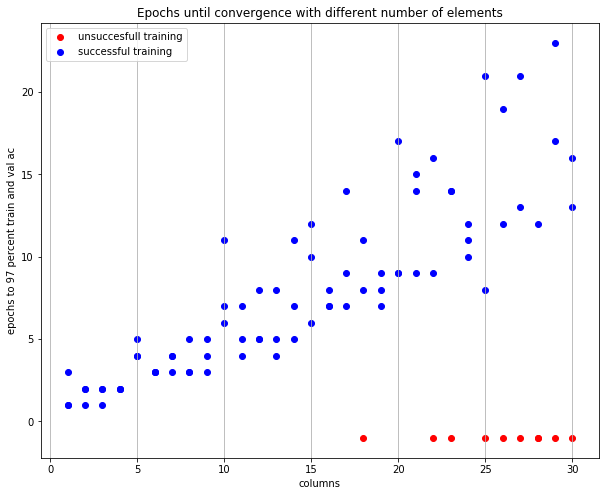

In [98]:
fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(x_d, y_d, color = 'red', label = 'unsuccesfull training')
ax.scatter(x_nd, y_nd, color = 'blue', label = 'successful training')

ax.legend(loc='upper left')
ax.set_title('Epochs until convergence with different number of elements')
ax.set_xlabel('columns')
ax.set_ylabel('epochs to 97 percent train and val ac')
ax.grid(axis="x", which = 'both')
plt.show()

Note: Even in the column that has signal, only 20/282 values have the signal.
So the true proportion of signal elements is:

$$\frac{20}{282} \cdot \frac{1}{columns}$$

And the signal to background ratio is like:

$$20 : 282 \cdot columns - 20$$

In [214]:
def final_evaluation(Y_test, Y_predicts):
    Y_predict = Y_predicts[-1]
    roc_curve = sklearn.metrics.roc_curve(Y_test[:,1:], Y_predict[:,1:])
    plt.plot(roc_curve[0],roc_curve[1])
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve')
    plt.show()

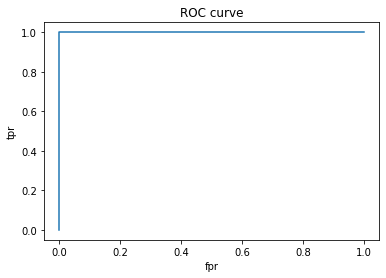

In [215]:
final_evaluation(Y_test, Y_predicts)

## only one dimension but with particle nerwork

In [221]:
X_train, X_val, X_test, Y_train,Y_val,Y_test = prep_and_shufflesplit_data_mock(mock_signal, mock_bg, 1)

Training set size, distribution:
(14000, 282, 1)
(array([0., 1.]), array([7011, 6989]))
Validations set size, distribution:
(4000, 282, 1)
(array([0., 1.]), array([2002, 1998]))
Test set size, distribution:
(2000, 282, 1)
(array([0., 1.]), array([ 987, 1013]))


In [222]:
Phi_sizes, F_sizes = ([100,50]), ([100,50])
vanilla_hidden_sizes = [100,50]
num_epoch = 15
num_cycles = 1
batch_size = 10

In [ ]:
histories, Y_test, Y_predicts, model = train_model(X_train, X_val, X_test, Y_train,Y_val,Y_test)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 1)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    200         input[0][0]                      
__________________________________________________________________________________________________
activation_64 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 50)     5050        activation_64[0][0]              
__________________________________________________________________________________________________
mask (Lamb

# task 3: Neural Network analysis - 1D

In [3]:
def get_random_datapoint_t3(sig, size = 2000):
    pts = np.random.normal(0.5, 0.05, size)
    if sig:
        pts[0] = np.random.normal(0.6, 0.05, 1)
    return pts

In [4]:
mock_signal_t3 = np.array([get_random_datapoint_t3(True) for _ in range(20000)])
mock_bg_t3 = np.array([get_random_datapoint_t3(False) for _ in range(20000)])

In [5]:
mock_signal_t3.shape

(20000, 2000)

In [6]:
def prep_data_t3(sig, bg):
    
    this_y_bg = np.zeros(len(bg))
    
    this_y_sig = np.ones(len(sig))
    
    """
    Shuffle + Train-Val-Test Split 
    """
    # Combine both data sets
    this_X = np.concatenate([bg, sig])
    this_y = np.concatenate([this_y_bg, this_y_sig])
    
    # Shuffle before we split
    this_X, this_y = shuffle(this_X, this_y)
    
    
    (X_train, X_val, _,
     y_train, y_val, _) = data_split(this_X, this_y, val=0.2, test=0)
        
            
    # change Y to categorical Matrix
    Y_train = to_categorical(y_train, num_classes=2)
    Y_val = to_categorical(y_val, num_classes=2)
    
    print('Training set size, distribution:')
    print(X_train.shape)
    print(np.unique(y_train,return_counts = True))
    print('Validations set size, distribution:')
    print(X_val.shape)
    print(np.unique(y_val,return_counts = True))
    
    return X_train, X_val, Y_train,Y_val

In [7]:
X_train_t3, X_val_t3, Y_train_t3,Y_val_t3 = prep_data_t3(mock_signal_t3, mock_bg_t3)

Training set size, distribution:
(32000, 2000)
(array([0., 1.]), array([16068, 15932]))
Validations set size, distribution:
(8000, 2000)
(array([0., 1.]), array([3932, 4068]))


### What is the theoretical best possible accuracy? We need this to be a benchmark.

In [8]:
hidden_sizes_t3 = [100, 50]
batch_size_t3 = 100
MAX_EPOCHS = 20

In [10]:
# dimension = 1
# hidden_sizes_t3 = [100, 50]
# batch_size_t3 = 20

# Xtrain, Xval = X_train_t3[:,:dimension], X_val_t3[:,:dimension]
# Ytrain, Yval = Y_train_t3,Y_val_t3
# inputs = tf.keras.Input(shape=(dimension,))
# x = inputs
# for size in hidden_sizes_t3:
#     x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)

# outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

# model = tf.keras.Model(inputs=inputs, outputs=outputs)

# model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0005)
# ,
#           loss=tf.losses.softmax_cross_entropy,
#           metrics=['accuracy'])
# train_acc = 0
# val_acc = 0
# success = 0
# history = model.fit(Xtrain, Ytrain,
#       epochs=30,
#       batch_size=batch_size_t3,
#       validation_data=(Xval, Yval),
#       verbose=1)
"""
Basically, training acc gets to 83.something percent, val acc gets to 84.something percent.
This seems to be the best possible result for this dataset.

So I will use 80 percent as the benchmark,
"""
pass

In [54]:
results = []
final_accuracies = []
for dimension in range(10, 1000, 30):
    
    for trial in range(5):
        
        print(f'starting with {dimension} dimensions, trial number {trial}')

        Xtrain, Xval = X_train_t3[:,:dimension], X_val_t3[:,:dimension]
        Ytrain, Yval = Y_train_t3,Y_val_t3

        inputs = tf.keras.Input(shape=(dimension,))
        x = inputs
        for size in hidden_sizes_t3:
            x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)

        outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0005),
                  loss=tf.losses.softmax_cross_entropy,
                  metrics=['accuracy'])

        train_acc = 0
        val_acc = 0
        success = 0
        for epoch in range(MAX_EPOCHS):
            print(f" {epoch} ", end='')
            history = model.fit(Xtrain, Ytrain,
                  epochs=1,
                  batch_size=batch_size_t3,
                  validation_data=(Xval, Yval),
                  verbose=0)
            train_acc = model.evaluate(Xtrain, Ytrain, verbose = 0)[1]
            val_acc = model.evaluate(Xval, Yval, verbose = 0)[1]
            if (train_acc >= 0.80 and val_acc >= 0.80):
                success = 1
                print('')
                results.append([dimension,epoch])
                break
        if success:
            final_accuracies.append([dimension,0.8])
        else:
            final_accuracies.append([dimension, train_acc])
            print('')
            results.append([dimension,-1])

starting with 10 dimensions, trial number 0
 0 
starting with 10 dimensions, trial number 1
 0 
starting with 10 dimensions, trial number 2
 0 
starting with 10 dimensions, trial number 3
 0 
starting with 10 dimensions, trial number 4
 0  1 
starting with 40 dimensions, trial number 0
 0  1 
starting with 40 dimensions, trial number 1
 0  1 
starting with 40 dimensions, trial number 2
 0  1 
starting with 40 dimensions, trial number 3
 0  1  2 
starting with 40 dimensions, trial number 4
 0  1 
starting with 70 dimensions, trial number 0
 0  1  2 
starting with 70 dimensions, trial number 1
 0  1  2 
starting with 70 dimensions, trial number 2
 0  1 
starting with 70 dimensions, trial number 3
 0  1 
starting with 70 dimensions, trial number 4
 0  1  2 
starting with 100 dimensions, trial number 0
 0  1 
starting with 100 dimensions, trial number 1
 0  1 
starting with 100 dimensions, trial number 2
 0  1  2 
starting with 100 dimensions, trial number 3
 0  1  2 
starting with 100 dim

In [ ]:
results_zoom = []
for dimension in range(800, 1300, 10):
    
    for trial in range(10):
        
        print(f'starting with {dimension} dimensions, trial number {trial}')

        Xtrain, Xval = X_train_t3[:,:dimension], X_val_t3[:,:dimension]
        Ytrain, Yval = Y_train_t3,Y_val_t3

        inputs = tf.keras.Input(shape=(dimension,))
        x = inputs
        for size in hidden_sizes_t3:
            x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)

        outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0005),
                  loss=tf.losses.softmax_cross_entropy,
                  metrics=['accuracy'])

        train_acc = 0
        val_acc = 0
        success = 0
        for epoch in range(MAX_EPOCHS):
            print(f" {epoch} ", end='')
            history = model.fit(Xtrain, Ytrain,
                  epochs=1,
                  batch_size=batch_size_t3,
                  validation_data=(Xval, Yval),
                  verbose=0)
            train_acc = model.evaluate(Xtrain, Ytrain, verbose = 0)[1]
            val_acc = model.evaluate(Xval, Yval, verbose = 0)[1]
            if (train_acc >= 0.80 and val_acc >= 0.80):
                success = 1
                print('')
                results_zoom.append([dimension,epoch])
                break
        if success:
#             final_accuracies.append([dimension,0.8])
            pass
        else:
#             if train_acc > 0.65:
#                 converging_but_too_slow.append([dimension, train_acc])
#             final_accuracies.append([dimension, train_acc])
            print('')
            results_zoom.append([dimension,-1])

In [11]:
results = [[10, 0],
 [10, 0],
 [10, 0],
 [10, 0],
 [10, 1],
 [40, 1],
 [40, 1],
 [40, 1],
 [40, 2],
 [40, 1],
 [70, 2],
 [70, 2],
 [70, 1],
 [70, 1],
 [70, 2],
 [100, 1],
 [100, 1],
 [100, 2],
 [100, 2],
 [100, 2],
 [130, 2],
 [130, 2],
 [130, 2],
 [130, 3],
 [130, 2],
 [160, 3],
 [160, 2],
 [160, 2],
 [160, 3],
 [160, 3],
 [190, 2],
 [190, 3],
 [190, 2],
 [190, 2],
 [190, 2],
 [220, 2],
 [220, 4],
 [220, 4],
 [220, 4],
 [220, 2],
 [250, 2],
 [250, 3],
 [250, 3],
 [250, 2],
 [250, 4],
 [280, 5],
 [280, 4],
 [280, 3],
 [280, 3],
 [280, 4],
 [310, 3],
 [310, 3],
 [310, 2],
 [310, 3],
 [310, 2],
 [340, 3],
 [340, 5],
 [340, 4],
 [340, 3],
 [340, 4],
 [370, 5],
 [370, 4],
 [370, 6],
 [370, 3],
 [370, 4],
 [400, 5],
 [400, 4],
 [400, 3],
 [400, 3],
 [400, 2],
 [430, 7],
 [430, 6],
 [430, 4],
 [430, 8],
 [430, 4],
 [460, 4],
 [460, 4],
 [460, 5],
 [460, 5],
 [460, 5],
 [490, 4],
 [490, 5],
 [490, 3],
 [490, 4],
 [490, 5],
 [520, 5],
 [520, 7],
 [520, 6],
 [520, 5],
 [520, 5],
 [550, 5],
 [550, 4],
 [550, 7],
 [550, 5],
 [550, 8],
 [580, 4],
 [580, 5],
 [580, 5],
 [580, 6],
 [580, 6],
 [610, 6],
 [610, 7],
 [610, 5],
 [610, 7],
 [610, 5],
 [640, 9],
 [640, 5],
 [640, 8],
 [640, 6],
 [640, 6],
 [670, 8],
 [670, 9],
 [670, 8],
 [670, 6],
 [670, 9],
 [700, 8],
 [700, 9],
 [700, 8],
 [700, 9],
 [700, 6],
 [730, 8],
 [730, 10],
 [730, 10],
 [730, 9],
 [730, 9],
 [760, 10],
 [760, 10],
 [760, 9],
 [760, 5],
 [760, 12],
 [790, 8],
 [790, 8],
 [790, 6],
 [790, 9],
 [790, 10],
 [820, 9],
 [820, -1],
 [820, 12],
 [820, 8],
 [820, 8],
 [850, 9],
 [850, 10],
 [850, 12],
 [850, 9],
 [850, 11],
 [880, 10],
 [880, 10],
 [880, 15],
 [880, 9],
 [880, 12],
 [910, 9],
 [910, 13],
 [910, 11],
 [910, 17],
 [910, 8],
 [940, 9],
 [940, 19],
 [940, -1],
 [940, 9],
 [940, 9],
 [970, 7],
 [970, -1],
 [970, 11],
 [970, 11],
 [970, 11],
 [1000, 8],
 [1000, -1],
 [1000, 8],
 [1000, 9],
 [1000, 12],
 [1300, -1],
 [1300, 11],
 [1300, -1],
 [1300, -1],
 [1300, -1],
 [1600, -1],
 [1600, -1],
 [1600, -1],
 [1600, -1],
 [1600, -1],
 [1100, 13],
 [1100, -1],
 [1100, -1],
 [1100, -1],
 [1100, -1]]

In [12]:
results_zoom = [[800, 12],
 [800, 10],
 [800, 10],
 [800, 7],
 [800, 7],
 [810, 6],
 [810, 9],
 [810, 8],
 [810, 9],
 [810, 6],
 [820, 9],
 [820, 8],
 [820, 5],
 [820, 12],
 [820, 7],
 [830, 7],
 [830, 13],
 [830, 10],
 [830, 8],
 [830, 9],
 [840, 11],
 [840, 10],
 [840, 10],
 [840, 10],
 [840, 8],
 [850, 7],
 [850, 12],
 [850, 8],
 [850, 16],
 [850, 11],
 [860, 9],
 [860, 8],
 [860, 12],
 [860, 10],
 [860, 7],
 [870, 12],
 [870, 10],
 [870, -1],
 [870, 9],
 [870, 6],
 [880, 7],
 [880, 9],
 [880, 9],
 [880, 16],
 [880, 10],
 [890, 10],
 [890, 12],
 [890, 9],
 [890, 13],
 [890, 11],
 [900, 11],
 [900, 5],
 [900, 7],
 [900, 11],
 [900, 10],
 [910, 12],
 [910, 13],
 [910, 15],
 [910, 12],
 [910, 10],
 [920, -1],
 [920, 6],
 [920, -1],
 [920, -1],
 [920, 11],
 [930, 6],
 [930, 9],
 [930, 13],
 [930, -1],
 [930, 10],
 [940, -1],
 [940, 11],
 [940, 14],
 [940, 10],
 [940, 9],
 [950, 11],
 [950, 10],
 [950, -1],
 [950, 12],
 [950, 9],
 [960, 11],
 [960, -1],
 [960, -1],
 [960, 14],
 [960, -1],
 [970, 9],
 [970, -1],
 [970, 9],
 [970, 17],
 [970, 12],
 [980, 10],
 [980, 10],
 [980, 13],
 [980, 8],
 [980, 11],
 [990, 18],
 [990, -1],
 [990, 10],
 [990, 12],
 [990, 13],
 [1000, 10],
 [1000, 14],
 [1000, 6],
 [1000, 9],
 [1000, -1],
 [1010, 14],
 [1010, 9],
 [1010, 10],
 [1010, -1],
 [1010, 12],
 [1020, 10],
 [1020, -1],
 [1020, 8],
 [1020, 14],
 [1020, 9],
 [1030, 13],
 [1030, 15],
 [1030, -1],
 [1030, 9],
 [1030, 6],
 [1040, 12],
 [1040, 12],
 [1040, 11],
 [1040, 8],
 [1040, -1],
 [1050, 10],
 [1050, 15],
 [1050, 10],
 [1050, -1],
 [1050, -1],
 [1060, -1],
 [1060, 12],
 [1060, 12],
 [1060, 9],
 [1060, 9],
 [1070, 12],
 [1070, 11],
 [1070, 10],
 [1070, 8],
 [1070, -1],
 [1080, 10],
 [1080, 10],
 [1080, -1],
 [1080, -1],
 [1080, -1],
 [1090, 8],
 [1090, -1],
 [1090, -1],
 [1090, 13],
 [1090, -1],
 [1100, 10],
 [1100, 9],
 [1100, 10],
 [1100, -1],
 [1100, 16],
 [1110, -1],
 [1110, -1],
 [1110, -1],
 [1110, -1],
 [1110, -1],
 [1120, 14],
 [1120, 14],
 [1120, -1],
 [1120, -1],
 [1120, 9],
 [1130, 11],
 [1130, 12],
 [1130, 14],
 [1130, -1],
 [1130, 12],
 [1140, -1],
 [1140, 11],
 [1140, 15],
 [1140, -1],
 [1140, -1],
 [1150, -1],
 [1150, 10],
 [1150, -1],
 [1150, 17],
 [1150, 9],
 [1160, -1],
 [1160, -1],
 [1160, -1],
 [1160, 12],
 [1160, 15],
 [1170, 12],
 [1170, 7],
 [1170, 9],
 [1170, 13],
 [1170, 12],
 [1180, -1],
 [1180, -1],
 [1180, -1],
 [1180, -1],
 [1180, 18],
 [1190, 17],
 [1190, -1],
 [1190, -1],
 [1190, -1],
 [1190, 10]]

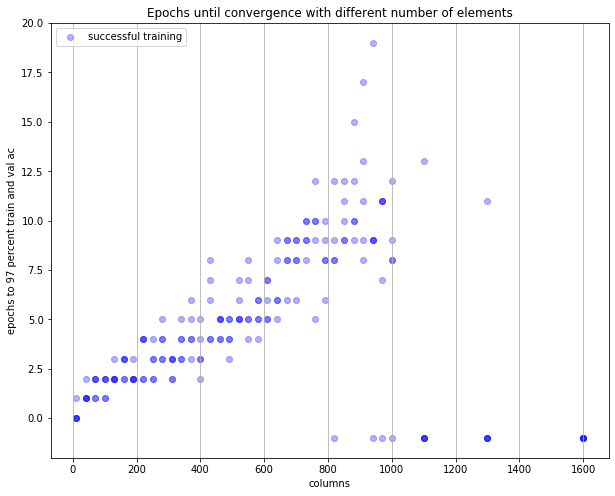

In [15]:
fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(*zip(*(results)), color = 'blue', label = 'successful training', alpha = 0.3)

ax.legend(loc='upper left')
ax.set_title('Epochs until convergence with different number of elements')
ax.set_xlabel('columns')
ax.set_ylabel('epochs to 97 percent train and val ac')
ax.grid(axis="x", which = 'both')
plt.show()

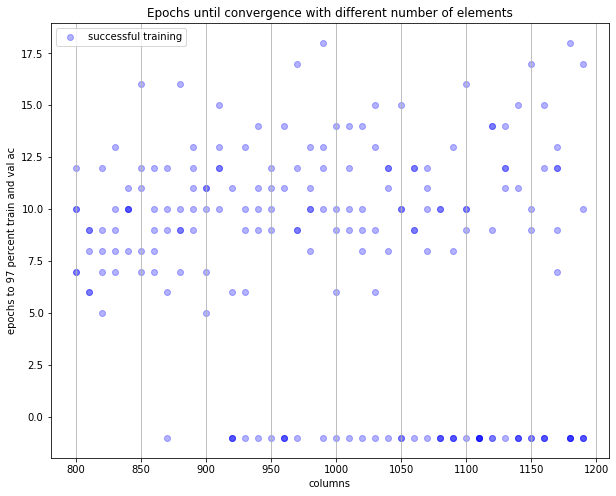

In [16]:
fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(*zip(*(results_zoom)), color = 'blue', label = 'successful training', alpha = 0.3)

ax.legend(loc='upper left')
ax.set_title('Epochs until convergence with different number of elements')
ax.set_xlabel('columns')
ax.set_ylabel('epochs to 97 percent train and val ac')
ax.grid(axis="x", which = 'both')
plt.show()

In [9]:
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(42)

In [10]:
initializer = tf.keras.initializers.glorot_normal(seed=42)

In [11]:
initializer

In [13]:
results_zoom_fixed = []
idx = 0

initializer = tf.keras.initializers.glorot_normal(seed=42)

for dimension in range(800, 1300, 10):
    
    for trial in range(4):
        
        print(f'starting with {dimension} dimensions, trial number {trial}')
        
        Xtrain, Xval = X_train_t3[:,:dimension], X_val_t3[:,:dimension]
        Ytrain, Yval = Y_train_t3,Y_val_t3

        inputs = tf.keras.Input(shape=(dimension,))
        x = inputs
        examine_layer = None
        for idx, size in enumerate(hidden_sizes_t3):
#             x = tf.keras.layers.Dense(size, activation=tf.nn.relu,
#                                       kernel_initializer = initializer)(x)
            x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)

            if examine_layer == None:
                examine_layer = x

#         outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax, kernel_initializer = initializer)(x)
        outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0005),
                  loss=tf.losses.softmax_cross_entropy,
                  metrics=['accuracy'])
        

        train_acc = 0
        val_acc = 0
        success = 0
        for epoch in range(20):
            print(f" {epoch} ", end='')
            history = model.fit(Xtrain, Ytrain,
                  epochs=1,
                  batch_size=batch_size_t3,
                  validation_data=(Xval, Yval),
                shuffle=False,
                  verbose=0)
            train_acc = model.evaluate(Xtrain, Ytrain, verbose = 0)[1]
            val_acc = model.evaluate(Xval, Yval, verbose = 0)[1]
            if (train_acc >= 0.80 and val_acc >= 0.80):
                success = 1
                print('')
                results_zoom_fixed.append([dimension,epoch])
                break
        if success:
#             final_accuracies.append([dimension,0.8])
            pass
        else:
#             if train_acc > 0.65:
#                 converging_but_too_slow.append([dimension, train_acc])
#             final_accuracies.append([dimension, train_acc])
            print('')
            results_zoom_fixed.append([dimension,-1])
        


starting with 800 dimensions, trial number 0
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
starting with 800 dimensions, trial number 1
 0  1  2  3  4  5 
starting with 800 dimensions, trial number 2
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
starting with 800 dimensions, trial number 3
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15 
starting with 810 dimensions, trial number 0
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
starting with 810 dimensions, trial number 1
 0  1  2  3  4  5  6  7 
starting with 810 dimensions, trial number 2
 0  1  2  3  4  5 
starting with 810 dimensions, trial number 3
 0  1  2  3  4  5  6  7  8  9  10  11  12  13 
starting with 820 dimensions, trial number 0
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
starting with 820 dimensions, trial number 1
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
starting with 820 dimensions, 

 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
starting with 1190 dimensions, trial number 3
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
starting with 1200 dimensions, trial number 0
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
starting with 1200 dimensions, trial number 1
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
starting with 1200 dimensions, trial number 2
 0  1  2  3  4  5  6  7  8  9  10  11 
starting with 1200 dimensions, trial number 3
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
starting with 1210 dimensions, trial number 0
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
starting with 1210 dimensions, trial number 1
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
starting with 1210 dimensions, trial number 2
 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
starting with 1210 dimens

In [32]:
1+2

3

# Task 4: deviation from the mean, does it matter?

In [25]:
get_random_datapoint_t3(True, 0.1, 2000)

array([0.64021856, 0.45802583, 0.55109006, ..., 0.39421652, 0.57680039,
       0.43759149])

In [26]:
def get_random_datapoint_t4(sig, deviation = 0.1, size = 2000):
    pts = np.random.normal(0.5, 0.05, size)
    if sig:
        pts[0] = np.random.normal(0.5 + deviation, 0.05, 1)
    return pts

In [17]:
def prep_data_t4(sig, bg):
    
    this_y_bg = np.zeros(len(bg))
    
    this_y_sig = np.ones(len(sig))
    
    """
    Shuffle + Train-Val-Test Split 
    """
    # Combine both data sets
    this_X = np.concatenate([bg, sig])
    this_y = np.concatenate([this_y_bg, this_y_sig])
    
    # Shuffle before we split
    this_X, this_y = shuffle(this_X, this_y)
    
    
    (X_train, X_val, _,
     y_train, y_val, _) = data_split(this_X, this_y, val=0.2, test=0)
        
            
    # change Y to categorical Matrix
    Y_train = to_categorical(y_train, num_classes=2)
    Y_val = to_categorical(y_val, num_classes=2)
    
    
    return X_train, X_val, Y_train,Y_val

In [15]:
deviations = [0.05, 0.1, 0.2, 0.5]

In [20]:
hidden_sizes_t4 = [100, 50]
batch_size_t4 = 100
MAX_EPOCHS = 20

In [28]:
for deviation in [0.5]:
    mock_signal_t4 = np.array([get_random_datapoint_t4(True, deviation, 4000) for _ in range(5000)])
    mock_bg_t4 = np.array([get_random_datapoint_t4(False, deviation, 4000) for _ in range(5000)])
    X_train_t4, X_val_t4, Y_train_t4,Y_val_t4 = prep_data_t4(mock_signal_t4, mock_bg_t4)
    results = []
    final_accuracies = []
    for dimension in range(2500, 4000, 200):

        dimension_ok = False
        for trial in range(3):

            print(f'starting with {deviation} deviation, {dimension} dimensions, trial number {trial}')

            Xtrain, Xval = X_train_t4[:,:dimension], X_val_t4[:,:dimension]
            Ytrain, Yval = Y_train_t4,Y_val_t4

            inputs = tf.keras.Input(shape=(dimension,))
            
            x = inputs
            
            for size in hidden_sizes_t4:
                x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)

            outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

            model = tf.keras.Model(inputs=inputs, outputs=outputs)

            model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0005),
                      loss=tf.losses.softmax_cross_entropy,
                      metrics=['accuracy'])

            train_acc = 0
            val_acc = 0
            success = 0
            for epoch in range(MAX_EPOCHS):
#                 print(f" {epoch} ", end='')
                history = model.fit(Xtrain, Ytrain,
                      epochs=1,
                      batch_size=batch_size_t4,
                      validation_data=(Xval, Yval),
                      verbose=0)
                train_acc = model.evaluate(Xtrain, Ytrain, verbose = 0)[1]
#                 val_acc = model.evaluate(Xval, Yval, verbose = 0)[1]
                if (train_acc >= 0.60):
                    success = 1
                    break
            if success:
                print(f'success at trial {trial}')
                dimension_ok = True
                break
        if dimension_ok == False:
            print(f'failed at dimension {dimension}')
            break
    

starting with 0.5 deviation, 2500 dimensions, trial number 0
success at trial 0
starting with 0.5 deviation, 2700 dimensions, trial number 0
success at trial 0
starting with 0.5 deviation, 2900 dimensions, trial number 0
success at trial 0
starting with 0.5 deviation, 3100 dimensions, trial number 0
success at trial 0
starting with 0.5 deviation, 3300 dimensions, trial number 0
success at trial 0
starting with 0.5 deviation, 3500 dimensions, trial number 0
success at trial 0
starting with 0.5 deviation, 3700 dimensions, trial number 0
success at trial 0
starting with 0.5 deviation, 3900 dimensions, trial number 0
success at trial 0


0.05: failed between 500 and 700
0.1: failed between 1300 and 1500
0.2: failed between 2300 and 2500.



# Task 5: does network size matter

In [29]:
hidden_sizes_t5 = [200, 100]
batch_size_t4 = 100
MAX_EPOCHS = 20

In [32]:
X_train_t5, X_val_t5, Y_train_t5,Y_val_t5 = prep_data_t3(mock_signal_t3, mock_bg_t3)

Training set size, distribution:
(32000, 2000)
(array([0., 1.]), array([16003, 15997]))
Validations set size, distribution:
(8000, 2000)
(array([0., 1.]), array([3997, 4003]))


In [33]:
results5 = []
for dimension in range(500, 2500, 50):
    
    for trial in range(5):
        
        print(f'starting with {dimension} dimensions, trial number {trial}')

        Xtrain, Xval = X_train_t3[:,:dimension], X_val_t3[:,:dimension]
        Ytrain, Yval = Y_train_t3,Y_val_t3

        inputs = tf.keras.Input(shape=(dimension,))
        x = inputs
        for size in hidden_sizes_t3:
            x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)

        outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0005),
                  loss=tf.losses.softmax_cross_entropy,
                  metrics=['accuracy'])

        train_acc = 0
        val_acc = 0
        success = 0
        for epoch in range(MAX_EPOCHS):
            print(f" {epoch} ", end='')
            history = model.fit(Xtrain, Ytrain,
                  epochs=1,
                  batch_size=batch_size_t3,
                  validation_data=(Xval, Yval),
                  verbose=0)
            train_acc = model.evaluate(Xtrain, Ytrain, verbose = 0)[1]
            val_acc = model.evaluate(Xval, Yval, verbose = 0)[1]
            if (train_acc >= 0.80 and val_acc >= 0.80):
                success = 1
                print('')
                results5.append([dimension,epoch])
                break
        if success:
            pass
        else:
            results5.append([dimension,-1])

starting with 500 dimensions, trial number 0
 0  1  2  3  4  5 
starting with 500 dimensions, trial number 1
 0  1  2  3  4  5 
starting with 500 dimensions, trial number 2
 0  1  2  3  4  5  6  7  8  9 
starting with 500 dimensions, trial number 3
 0  1  2  3  4  5 
starting with 500 dimensions, trial number 4
 0  1  2  3  4  5  6 
starting with 550 dimensions, trial number 0
 0  1  2  3  4  5 
starting with 550 dimensions, trial number 1
 0  1  2  3  4  5  6 
starting with 550 dimensions, trial number 2
 0  1  2  3  4  5 
starting with 550 dimensions, trial number 3
 0  1  2  3  4  5 
starting with 550 dimensions, trial number 4
 0  1  2  3  4  5 
starting with 600 dimensions, trial number 0
 0  1  2  3  4  5  6  7 
starting with 600 dimensions, trial number 1
 0  1  2  3 
starting with 600 dimensions, trial number 2
 0  1  2  3  4  5 
starting with 600 dimensions, trial number 3
 0  1  2  3  4 
starting with 600 dimensions, trial number 4
 0  1  2  3  4  5 
starting with 650 dimensi

ValueError: Error when checking input: expected input_427 to have shape (2050,) but got array with shape (2000,)

In [34]:
results5

[[500, 5],
 [500, 5],
 [500, 9],
 [500, 5],
 [500, 6],
 [550, 5],
 [550, 6],
 [550, 5],
 [550, 5],
 [550, 5],
 [600, 7],
 [600, 3],
 [600, 5],
 [600, 4],
 [600, 5],
 [650, 7],
 [650, 6],
 [650, 13],
 [650, 4],
 [650, 4],
 [700, 7],
 [700, 7],
 [700, 9],
 [700, 12],
 [700, 7],
 [750, 5],
 [750, 10],
 [750, 14],
 [750, -1],
 [750, 11],
 [800, 11],
 [800, 11],
 [800, 7],
 [800, 9],
 [800, 8],
 [850, 11],
 [850, 13],
 [850, 12],
 [850, 10],
 [850, 9],
 [900, 11],
 [900, 8],
 [900, -1],
 [900, 10],
 [900, -1],
 [950, 18],
 [950, 12],
 [950, 10],
 [950, 11],
 [950, 14],
 [1000, -1],
 [1000, -1],
 [1000, 13],
 [1000, -1],
 [1000, 10],
 [1050, 14],
 [1050, 13],
 [1050, 12],
 [1050, 10],
 [1050, 10],
 [1100, 12],
 [1100, -1],
 [1100, 14],
 [1100, 10],
 [1100, -1],
 [1150, 19],
 [1150, 16],
 [1150, 12],
 [1150, -1],
 [1150, -1],
 [1200, 15],
 [1200, 13],
 [1200, -1],
 [1200, -1],
 [1200, -1],
 [1250, -1],
 [1250, -1],
 [1250, -1],
 [1250, -1],
 [1250, 18],
 [1300, -1],
 [1300, -1],
 [1300, 12],


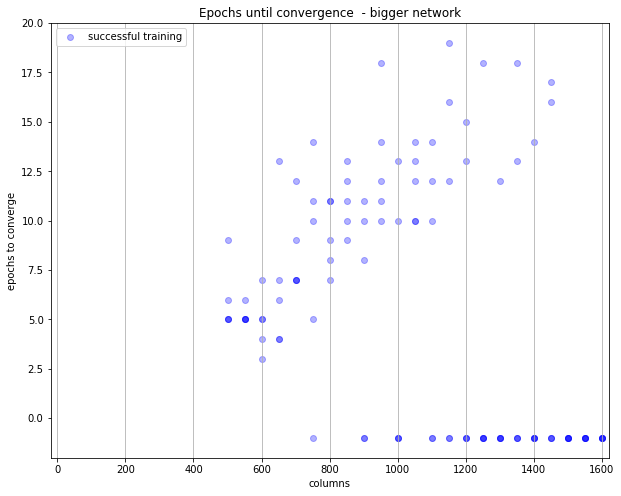

In [38]:
fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(*zip(*(results5)), color = 'blue', label = 'successful training', alpha = 0.3)

ax.legend(loc='upper left')
ax.set_title('Epochs until convergence  - bigger network')
ax.set_xlabel('columns')
ax.set_ylabel('epochs to converge')
ax.set_xlim((-20,1620))
ax.grid(axis="x", which = 'both')
plt.show()

# Task 6

In [2]:
# copied from t3
def get_random_datapoint_t6(sig, size = 2000):
    pts = np.random.normal(0.5, 0.05, size)
    if sig:
        pts[0] = np.random.normal(0.6, 0.05, 1)
    return pts

In [3]:
# 5x from before
mock_signal_t6 = np.array([get_random_datapoint_t6(True) for _ in range(100000)])
mock_bg_t6 = np.array([get_random_datapoint_t6(False) for _ in range(100000)])

mock_signal_t6.shape

In [6]:
def prep_data_t6(sig, bg):
    
    this_y_bg = np.zeros(len(bg))
    
    this_y_sig = np.ones(len(sig))
    
    """
    Shuffle + Train-Val-Test Split 
    """
    # Combine both data sets
    this_X = np.concatenate([bg, sig])
    this_y = np.concatenate([this_y_bg, this_y_sig])
    
    # Shuffle before we split
    this_X, this_y = shuffle(this_X, this_y)
    
    
    (X_train, X_val, _,
     y_train, y_val, _) = data_split(this_X, this_y, val=0.2, test=0)
        
            
    # change Y to categorical Matrix
    Y_train = to_categorical(y_train, num_classes=2)
    Y_val = to_categorical(y_val, num_classes=2)
    
    print('Training set size, distribution:')
    print(X_train.shape)
    print(np.unique(y_train,return_counts = True))
    print('Validations set size, distribution:')
    print(X_val.shape)
    print(np.unique(y_val,return_counts = True))
    
    return X_train, X_val, Y_train,Y_val

X_train_t6, X_val_t6, Y_train_t6,Y_val_t6 = prep_data_t6(mock_signal_t6, mock_bg_t6)

In [15]:
hidden_sizes_t6 = [100, 50]
batch_size_t6 = 100
MAX_EPOCHS = 10

In [20]:
results6 = []
for dimension in range(1000, 2000, 100):
    
    for trial in range(3):
        
        print(f'starting with {dimension} dimensions, trial number {trial}')

        Xtrain, Xval = X_train_t6[:,:dimension], X_val_t6[:,:dimension]
        Ytrain, Yval = Y_train_t6,Y_val_t6

        inputs = tf.keras.Input(shape=(dimension,))
        x = inputs
        for size in hidden_sizes_t6:
            x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)

        outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0005),
                  loss=tf.losses.softmax_cross_entropy,
                  metrics=['accuracy'])

        train_acc = 0
        val_acc = 0
        success = 0
        for epoch in tqdm(range(MAX_EPOCHS)):
#             print(f" {epoch} ", end='')
            history = model.fit(Xtrain, Ytrain,
                  epochs=1,
                  batch_size=batch_size_t6,
                  validation_data=(Xval, Yval),
                  verbose=0)
            train_acc = model.evaluate(Xtrain, Ytrain, verbose = 0)[1]
            val_acc = model.evaluate(Xval, Yval, verbose = 0)[1]
            if (train_acc >= 0.70 and val_acc >= 0.70):
                success = 1
                print('done')
                results6.append([dimension,epoch])
                break
        if success:
            pass
        else:
            print('failed')
            results6.append([dimension,-1])

starting with 1000 dimensions, trial number 0


 10%|█         | 1/10 [00:36<05:26, 36.28s/it]


done
starting with 1000 dimensions, trial number 1


100%|██████████| 10/10 [03:00<00:00, 18.07s/it]


failed
starting with 1000 dimensions, trial number 2


 10%|█         | 1/10 [00:36<05:32, 36.98s/it]


done
starting with 1100 dimensions, trial number 0


100%|██████████| 10/10 [03:04<00:00, 18.42s/it]


failed
starting with 1100 dimensions, trial number 1


100%|██████████| 10/10 [03:06<00:00, 18.62s/it]


failed
starting with 1100 dimensions, trial number 2


 20%|██        | 2/10 [00:57<03:48, 28.51s/it]


done
starting with 1200 dimensions, trial number 0


 10%|█         | 1/10 [00:38<05:49, 38.86s/it]


done
starting with 1200 dimensions, trial number 1


 20%|██        | 2/10 [00:57<03:50, 28.84s/it]


done
starting with 1200 dimensions, trial number 2


100%|██████████| 10/10 [03:13<00:00, 19.37s/it]


failed
starting with 1300 dimensions, trial number 0


100%|██████████| 10/10 [03:14<00:00, 19.49s/it]


failed
starting with 1300 dimensions, trial number 1


 10%|█         | 1/10 [00:39<05:58, 39.87s/it]

done
starting with 1300 dimensions, trial number 2



100%|██████████| 10/10 [03:17<00:00, 19.74s/it]


failed
starting with 1400 dimensions, trial number 0


100%|██████████| 10/10 [03:18<00:00, 19.81s/it]


failed
starting with 1400 dimensions, trial number 1


100%|██████████| 10/10 [03:21<00:00, 20.19s/it]


failed
starting with 1400 dimensions, trial number 2


 10%|█         | 1/10 [00:41<06:12, 41.39s/it]


done
starting with 1500 dimensions, trial number 0


100%|██████████| 10/10 [03:26<00:00, 20.64s/it]


failed
starting with 1500 dimensions, trial number 1


100%|██████████| 10/10 [03:26<00:00, 20.61s/it]


failed
starting with 1500 dimensions, trial number 2


100%|██████████| 10/10 [03:24<00:00, 20.46s/it]


failed
starting with 1600 dimensions, trial number 0


100%|██████████| 10/10 [03:31<00:00, 21.14s/it]


failed
starting with 1600 dimensions, trial number 1


 30%|███       | 3/10 [01:26<03:20, 28.70s/it]


done
starting with 1600 dimensions, trial number 2


100%|██████████| 10/10 [03:32<00:00, 21.22s/it]


failed
starting with 1700 dimensions, trial number 0


100%|██████████| 10/10 [03:35<00:00, 21.50s/it]


failed
starting with 1700 dimensions, trial number 1


100%|██████████| 10/10 [03:36<00:00, 21.62s/it]


failed
starting with 1700 dimensions, trial number 2


100%|██████████| 10/10 [03:36<00:00, 21.67s/it]


failed
starting with 1800 dimensions, trial number 0


100%|██████████| 10/10 [03:40<00:00, 22.08s/it]


failed
starting with 1800 dimensions, trial number 1


100%|██████████| 10/10 [03:41<00:00, 22.10s/it]


failed
starting with 1800 dimensions, trial number 2


100%|██████████| 10/10 [03:40<00:00, 22.07s/it]


failed
starting with 1900 dimensions, trial number 0


100%|██████████| 10/10 [03:43<00:00, 22.39s/it]


failed
starting with 1900 dimensions, trial number 1


100%|██████████| 10/10 [03:43<00:00, 22.37s/it]


failed
starting with 1900 dimensions, trial number 2


100%|██████████| 10/10 [03:45<00:00, 22.52s/it]

failed


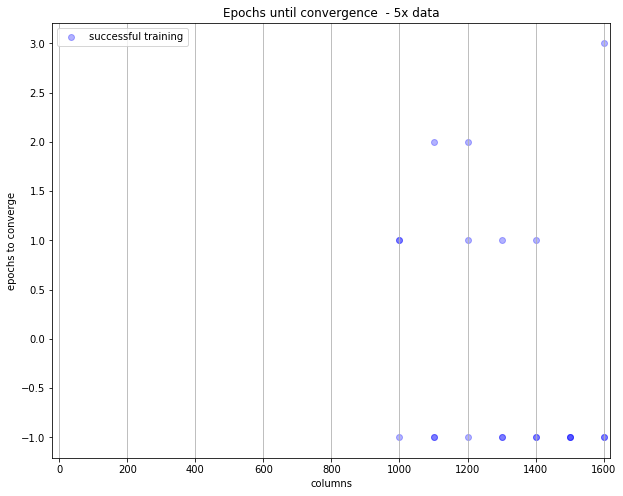

In [21]:
fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(*zip(*(results6)), color = 'blue', label = 'successful training', alpha = 0.3)

ax.legend(loc='upper left')
ax.set_title('Epochs until convergence  - 5x data')
ax.set_xlabel('columns')
ax.set_ylabel('epochs to converge')
ax.set_xlim((-20,1620))
ax.grid(axis="x", which = 'both')
plt.show()

# Task 7

In [3]:
from random import random

In [4]:
def get_random_datapoint_t7(sig, size = 2000):
    pts = np.random.normal(0.5, 0.05, size)
    if sig and (random() < 0.1):
        pts[0] = np.random.normal(0.6, 0.05, 1)
    return pts

mock_signal_t7 = np.array([get_random_datapoint_t7(True) for _ in range(20000)])
mock_bg_t7 = np.array([get_random_datapoint_t7(False) for _ in range(20000)])

mock_signal_t7.shape

In [6]:
def prep_data_t7(sig, bg):
    
    this_y_bg = np.zeros(len(bg))
    
    this_y_sig = np.ones(len(sig))
    
    """
    Shuffle + Train-Val-Test Split 
    """
    # Combine both data sets
    this_X = np.concatenate([bg, sig])
    this_y = np.concatenate([this_y_bg, this_y_sig])
    
    # Shuffle before we split
    this_X, this_y = shuffle(this_X, this_y)
    
    
    (X_train, X_val, _,
     y_train, y_val, _) = data_split(this_X, this_y, val=0.2, test=0)
        
    X_val = np.ones(X_val.shape) * 0.5
    X_val[:,0] = 0.5 + 0.1*y_val
    
    # change Y to categorical Matrix
    Y_train = to_categorical(y_train, num_classes=2)
    Y_val = to_categorical(y_val, num_classes=2)
    
    print('Training set size, distribution:')
    print(X_train.shape)
    print(np.unique(y_train,return_counts = True))
    print('Validations set size, distribution:')
    print(X_val.shape)
    print(np.unique(y_val,return_counts = True))
    
    return X_train, X_val, Y_train,Y_val

X_train_t7, X_val_t7, Y_train_t7,Y_val_t7 = prep_data_t7(mock_signal_t7, mock_bg_t7)

Training set size, distribution:
(32000, 2000)
(array([0., 1.]), array([16012, 15988]))
Validations set size, distribution:
(8000, 2000)
(array([0., 1.]), array([3988, 4012]))


In [15]:
hidden_sizes_t7 = [100, 50]
batch_size_t7 = 100
MAX_EPOCHS = 60

results7 = []
for dimension in range(2, 500, 20):
    
    for trial in range(3):
        
        print(f'starting with {dimension} dimensions, trial number {trial}')

        Xtrain, Xval = X_train_t7[:,:dimension], X_val_t7[:,:dimension]
        Ytrain, Yval = Y_train_t7,Y_val_t7

        inputs = tf.keras.Input(shape=(dimension,))
        x = inputs
        for size in hidden_sizes_t7:
            x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)

        outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001),
                  loss=tf.losses.softmax_cross_entropy,
                  metrics=['accuracy'])

        train_acc = 0
        val_acc = 0
        success = 0
        for epoch in tqdm(range(MAX_EPOCHS)):
#             print(f" {epoch} ", end='')
            history = model.fit(Xtrain, Ytrain,
                  epochs=1,
                  batch_size=batch_size_t7,
                  validation_data=(Xval, Yval),
                  verbose=0)
            train_acc = model.evaluate(Xtrain, Ytrain, verbose = 0)[1]
            val_acc = model.evaluate(Xval, Yval, verbose = 0)[1]
            if (val_acc >= 0.70):
                success = 1
                print('done')
                results7.append([dimension,epoch])
                break
        if success:
            pass
        else:
            print(f'failed {val_acc}')
            results7.append([dimension,-1])

starting with 2 dimensions, trial number 0


  2%|▏         | 1/60 [00:09<09:43,  9.90s/it]


done
starting with 2 dimensions, trial number 1


  2%|▏         | 1/60 [00:10<10:15, 10.43s/it]


done
starting with 2 dimensions, trial number 2


  2%|▏         | 1/60 [00:10<10:11, 10.37s/it]


done
starting with 22 dimensions, trial number 0


  2%|▏         | 1/60 [00:10<10:24, 10.59s/it]


done
starting with 22 dimensions, trial number 1


  3%|▎         | 2/60 [00:14<07:00,  7.24s/it]


done
starting with 22 dimensions, trial number 2


  3%|▎         | 2/60 [00:14<07:14,  7.49s/it]


done
starting with 42 dimensions, trial number 0


 13%|█▎        | 8/60 [00:38<04:10,  4.83s/it]


done
starting with 42 dimensions, trial number 1


  2%|▏         | 1/60 [00:11<11:10, 11.36s/it]


done
starting with 42 dimensions, trial number 2


 18%|█▊        | 11/60 [00:49<03:42,  4.54s/it]


done
starting with 62 dimensions, trial number 0


  7%|▋         | 4/60 [00:23<05:28,  5.86s/it]


done
starting with 62 dimensions, trial number 1


  5%|▌         | 3/60 [00:19<06:14,  6.57s/it]


done
starting with 62 dimensions, trial number 2


  2%|▏         | 1/60 [00:11<11:43, 11.93s/it]


done
starting with 82 dimensions, trial number 0


  0%|          | 0/60 [00:07<?, ?it/s]


done
starting with 82 dimensions, trial number 1


100%|██████████| 60/60 [04:05<00:00,  4.09s/it]


failed 0.5015
starting with 82 dimensions, trial number 2


100%|██████████| 60/60 [04:06<00:00,  4.11s/it]


failed 0.4985
starting with 102 dimensions, trial number 0


100%|██████████| 60/60 [04:07<00:00,  4.13s/it]


failed 0.4985
starting with 102 dimensions, trial number 1


100%|██████████| 60/60 [04:08<00:00,  4.13s/it]


failed 0.5015
starting with 102 dimensions, trial number 2


 12%|█▏        | 7/60 [00:37<04:42,  5.33s/it]


done
starting with 122 dimensions, trial number 0


100%|██████████| 60/60 [04:10<00:00,  4.17s/it]


failed 0.4985
starting with 122 dimensions, trial number 1


100%|██████████| 60/60 [04:13<00:00,  4.22s/it]


failed 0.4985
starting with 122 dimensions, trial number 2


100%|██████████| 60/60 [04:13<00:00,  4.22s/it]


failed 0.4985
starting with 142 dimensions, trial number 0


100%|██████████| 60/60 [04:16<00:00,  4.27s/it]


failed 0.5015
starting with 142 dimensions, trial number 1


100%|██████████| 60/60 [04:16<00:00,  4.28s/it]


failed 0.5015
starting with 142 dimensions, trial number 2


100%|██████████| 60/60 [04:16<00:00,  4.28s/it]


failed 0.4985
starting with 162 dimensions, trial number 0


100%|██████████| 60/60 [04:18<00:00,  4.31s/it]


failed 0.4985
starting with 162 dimensions, trial number 1


100%|██████████| 60/60 [04:19<00:00,  4.32s/it]


failed 0.4985
starting with 162 dimensions, trial number 2


100%|██████████| 60/60 [04:21<00:00,  4.35s/it]


failed 0.4985
starting with 182 dimensions, trial number 0


100%|██████████| 60/60 [04:20<00:00,  4.33s/it]


failed 0.4985
starting with 182 dimensions, trial number 1


100%|██████████| 60/60 [04:21<00:00,  4.36s/it]


failed 0.4985
starting with 182 dimensions, trial number 2


100%|██████████| 60/60 [04:26<00:00,  4.44s/it]


failed 0.4985
starting with 202 dimensions, trial number 0


100%|██████████| 60/60 [04:25<00:00,  4.43s/it]


failed 0.5015
starting with 202 dimensions, trial number 1


100%|██████████| 60/60 [04:25<00:00,  4.43s/it]


failed 0.4985
starting with 202 dimensions, trial number 2


100%|██████████| 60/60 [04:25<00:00,  4.42s/it]


failed 0.4985
starting with 222 dimensions, trial number 0


100%|██████████| 60/60 [04:27<00:00,  4.46s/it]


failed 0.4985
starting with 222 dimensions, trial number 1


100%|██████████| 60/60 [04:27<00:00,  4.46s/it]


failed 0.4985
starting with 222 dimensions, trial number 2


100%|██████████| 60/60 [04:29<00:00,  4.49s/it]


failed 0.5015
starting with 242 dimensions, trial number 0


100%|██████████| 60/60 [04:31<00:00,  4.52s/it]


failed 0.4985
starting with 242 dimensions, trial number 1


100%|██████████| 60/60 [04:27<00:00,  4.47s/it]


failed 0.4985
starting with 242 dimensions, trial number 2


100%|██████████| 60/60 [04:29<00:00,  4.50s/it]


failed 0.4985
starting with 262 dimensions, trial number 0


100%|██████████| 60/60 [04:30<00:00,  4.50s/it]


failed 0.4985
starting with 262 dimensions, trial number 1


100%|██████████| 60/60 [04:30<00:00,  4.51s/it]


failed 0.4985
starting with 262 dimensions, trial number 2


100%|██████████| 60/60 [04:30<00:00,  4.50s/it]


failed 0.5015
starting with 282 dimensions, trial number 0


100%|██████████| 60/60 [04:31<00:00,  4.53s/it]


failed 0.4985
starting with 282 dimensions, trial number 1


100%|██████████| 60/60 [04:30<00:00,  4.51s/it]


failed 0.5015
starting with 282 dimensions, trial number 2


100%|██████████| 60/60 [04:33<00:00,  4.57s/it]


failed 0.5015
starting with 302 dimensions, trial number 0


100%|██████████| 60/60 [04:34<00:00,  4.57s/it]


failed 0.5015
starting with 302 dimensions, trial number 1


100%|██████████| 60/60 [04:35<00:00,  4.60s/it]


failed 0.5015
starting with 302 dimensions, trial number 2


100%|██████████| 60/60 [04:36<00:00,  4.62s/it]


failed 0.4985
starting with 322 dimensions, trial number 0


100%|██████████| 60/60 [04:36<00:00,  4.62s/it]


failed 0.5015
starting with 322 dimensions, trial number 1


100%|██████████| 60/60 [04:39<00:00,  4.65s/it]


failed 0.4985
starting with 322 dimensions, trial number 2


100%|██████████| 60/60 [04:39<00:00,  4.66s/it]


failed 0.4985
starting with 342 dimensions, trial number 0


100%|██████████| 60/60 [04:41<00:00,  4.69s/it]


failed 0.4985
starting with 342 dimensions, trial number 1


100%|██████████| 60/60 [04:41<00:00,  4.69s/it]


failed 0.5015
starting with 342 dimensions, trial number 2


100%|██████████| 60/60 [04:45<00:00,  4.76s/it]


failed 0.4985
starting with 362 dimensions, trial number 0


100%|██████████| 60/60 [04:43<00:00,  4.73s/it]


failed 0.4985
starting with 362 dimensions, trial number 1


100%|██████████| 60/60 [04:44<00:00,  4.74s/it]


failed 0.5015
starting with 362 dimensions, trial number 2


100%|██████████| 60/60 [04:47<00:00,  4.78s/it]


failed 0.4985
starting with 382 dimensions, trial number 0


100%|██████████| 60/60 [04:50<00:00,  4.84s/it]


failed 0.4985
starting with 382 dimensions, trial number 1


100%|██████████| 60/60 [04:49<00:00,  4.82s/it]


failed 0.4985
starting with 382 dimensions, trial number 2


100%|██████████| 60/60 [04:51<00:00,  4.86s/it]


failed 0.4985
starting with 402 dimensions, trial number 0


100%|██████████| 60/60 [04:51<00:00,  4.85s/it]


failed 0.5015
starting with 402 dimensions, trial number 1


100%|██████████| 60/60 [04:53<00:00,  4.89s/it]


failed 0.4985
starting with 402 dimensions, trial number 2


100%|██████████| 60/60 [04:56<00:00,  4.93s/it]


failed 0.5015
starting with 422 dimensions, trial number 0


100%|██████████| 60/60 [04:55<00:00,  4.92s/it]


failed 0.4985
starting with 422 dimensions, trial number 1


100%|██████████| 60/60 [04:55<00:00,  4.92s/it]


failed 0.4985
starting with 422 dimensions, trial number 2


100%|██████████| 60/60 [04:58<00:00,  4.98s/it]


failed 0.5015
starting with 442 dimensions, trial number 0


100%|██████████| 60/60 [05:01<00:00,  5.02s/it]


failed 0.5015
starting with 442 dimensions, trial number 1


100%|██████████| 60/60 [05:01<00:00,  5.03s/it]


failed 0.4985
starting with 442 dimensions, trial number 2


100%|██████████| 60/60 [05:00<00:00,  5.00s/it]


failed 0.5015
starting with 462 dimensions, trial number 0


100%|██████████| 60/60 [05:03<00:00,  5.05s/it]


failed 0.4985
starting with 462 dimensions, trial number 1


100%|██████████| 60/60 [05:04<00:00,  5.08s/it]


failed 0.4985
starting with 462 dimensions, trial number 2


100%|██████████| 60/60 [05:05<00:00,  5.10s/it]


failed 0.4985
starting with 482 dimensions, trial number 0


100%|██████████| 60/60 [05:07<00:00,  5.12s/it]


failed 0.5015
starting with 482 dimensions, trial number 1


100%|██████████| 60/60 [05:09<00:00,  5.15s/it]


failed 0.4985
starting with 482 dimensions, trial number 2


100%|██████████| 60/60 [05:09<00:00,  5.15s/it]

failed 0.4985


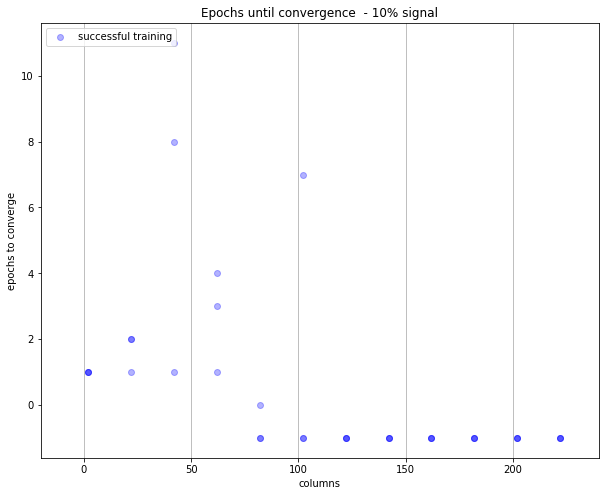

In [18]:
fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(*zip(*(results7)), color = 'blue', label = 'successful training', alpha = 0.3)

ax.legend(loc='upper left')
ax.set_title('Epochs until convergence  - 10% signal')
ax.set_xlabel('columns')
ax.set_ylabel('epochs to converge')
ax.set_xlim((-20,240))
ax.grid(axis="x", which = 'both')
plt.show()

In [20]:
hidden_sizes_t7 = [100, 50]
batch_size_t7 = 100
MAX_EPOCHS = 10

results7_zoom = []
for dimension in range(2, 120, 10):
    
    for trial in range(6):
        
        print(f'starting with {dimension} dimensions, trial number {trial}')

        Xtrain, Xval = X_train_t7[:,:dimension], X_val_t7[:,:dimension]
        Ytrain, Yval = Y_train_t7,Y_val_t7

        inputs = tf.keras.Input(shape=(dimension,))
        x = inputs
        for size in hidden_sizes_t7:
            x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)

        outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001),
                  loss=tf.losses.softmax_cross_entropy,
                  metrics=['accuracy'])

        train_acc = 0
        val_acc = 0
        success = 0
        for epoch in tqdm(range(MAX_EPOCHS)):
#             print(f" {epoch} ", end='')
            history = model.fit(Xtrain, Ytrain,
                  epochs=1,
                  batch_size=batch_size_t7,
                  validation_data=(Xval, Yval),
                  verbose=0)
            train_acc = model.evaluate(Xtrain, Ytrain, verbose = 0)[1]
            val_acc = model.evaluate(Xval, Yval, verbose = 0)[1]
            if (val_acc >= 0.65):
                success = 1
                print('done')
                results7_zoom.append([dimension,epoch])
                break
        if success:
            pass
        else:
            print(f'failed {val_acc}')
            results7_zoom.append([dimension,-1])

starting with 2 dimensions, trial number 0


  0%|          | 0/10 [01:23<?, ?it/s]

done
starting with 2 dimensions, trial number 1



 10%|█         | 1/10 [01:19<11:59, 79.89s/it]

done
starting with 2 dimensions, trial number 2



 10%|█         | 1/10 [01:20<12:01, 80.22s/it]

done
starting with 2 dimensions, trial number 3



 10%|█         | 1/10 [01:20<12:03, 80.41s/it]

done
starting with 2 dimensions, trial number 4



 20%|██        | 2/10 [01:49<07:19, 54.97s/it]

done
starting with 2 dimensions, trial number 5



  0%|          | 0/10 [00:55<?, ?it/s]

done
starting with 12 dimensions, trial number 0



  0%|          | 0/10 [00:52<?, ?it/s]

done
starting with 12 dimensions, trial number 1



 20%|██        | 2/10 [02:08<08:35, 64.38s/it]

done
starting with 12 dimensions, trial number 2



 20%|██        | 2/10 [01:52<07:30, 56.31s/it]

done
starting with 12 dimensions, trial number 3



 20%|██        | 2/10 [01:53<07:33, 56.68s/it]

done
starting with 12 dimensions, trial number 4



  0%|          | 0/10 [00:57<?, ?it/s]

done
starting with 12 dimensions, trial number 5



  0%|          | 0/10 [00:58<?, ?it/s]

done
starting with 22 dimensions, trial number 0



 60%|██████    | 6/10 [03:52<02:34, 38.67s/it]

done
starting with 22 dimensions, trial number 1



 30%|███       | 3/10 [02:25<05:38, 48.40s/it]

done
starting with 22 dimensions, trial number 2



 50%|█████     | 5/10 [03:20<03:20, 40.18s/it]

done
starting with 22 dimensions, trial number 3



 30%|███       | 3/10 [02:26<05:42, 48.91s/it]

done
starting with 22 dimensions, trial number 4



 40%|████      | 4/10 [03:05<04:38, 46.36s/it]

done
starting with 22 dimensions, trial number 5



 40%|████      | 4/10 [02:53<04:19, 43.30s/it]

done
starting with 32 dimensions, trial number 0



 70%|███████   | 7/10 [04:28<01:55, 38.34s/it]

done
starting with 32 dimensions, trial number 1



 10%|█         | 1/10 [01:27<13:11, 87.96s/it]

done
starting with 32 dimensions, trial number 2



 60%|██████    | 6/10 [04:03<02:42, 40.63s/it]

done
starting with 32 dimensions, trial number 3



 30%|███       | 3/10 [02:29<05:48, 49.81s/it]

done
starting with 32 dimensions, trial number 4



 20%|██        | 2/10 [01:59<07:57, 59.71s/it]

done
starting with 32 dimensions, trial number 5



 10%|█         | 1/10 [01:32<13:51, 92.35s/it]

done
starting with 42 dimensions, trial number 0



 20%|██        | 2/10 [02:06<08:24, 63.10s/it]

done
starting with 42 dimensions, trial number 1



  0%|          | 0/10 [01:11<?, ?it/s]

done
starting with 42 dimensions, trial number 2



 40%|████      | 4/10 [03:24<05:07, 51.22s/it]

done
starting with 42 dimensions, trial number 3



 50%|█████     | 5/10 [03:37<03:37, 43.56s/it]

done
starting with 42 dimensions, trial number 4



 30%|███       | 3/10 [02:36<06:06, 52.32s/it]

done
starting with 42 dimensions, trial number 5



 70%|███████   | 7/10 [04:40<02:00, 40.12s/it]

done
starting with 52 dimensions, trial number 0



 20%|██        | 2/10 [02:07<08:31, 63.93s/it]

done
starting with 52 dimensions, trial number 1



100%|██████████| 10/10 [05:43<00:00, 34.33s/it]


failed 0.5015
starting with 52 dimensions, trial number 2


 80%|████████  | 8/10 [05:56<01:29, 44.50s/it]

done
starting with 52 dimensions, trial number 3



100%|██████████| 10/10 [05:54<00:00, 35.46s/it]


failed 0.5015
starting with 52 dimensions, trial number 4


 20%|██        | 2/10 [02:09<08:38, 64.81s/it]

done
starting with 52 dimensions, trial number 5



100%|██████████| 10/10 [05:50<00:00, 35.10s/it]


failed 0.4985
starting with 62 dimensions, trial number 0


100%|██████████| 10/10 [06:02<00:00, 36.24s/it]


failed 0.5015
starting with 62 dimensions, trial number 1


 40%|████      | 4/10 [03:49<05:43, 57.29s/it]

done
starting with 62 dimensions, trial number 2



100%|██████████| 10/10 [06:06<00:00, 36.64s/it]


failed 0.4985
starting with 62 dimensions, trial number 3


100%|██████████| 10/10 [06:09<00:00, 36.95s/it]


failed 0.5015
starting with 62 dimensions, trial number 4


 80%|████████  | 8/10 [05:24<01:21, 40.54s/it]

done
starting with 62 dimensions, trial number 5



 80%|████████  | 8/10 [05:54<01:28, 44.34s/it]

done
starting with 72 dimensions, trial number 0



100%|██████████| 10/10 [06:45<00:00, 40.54s/it]


failed 0.4985
starting with 72 dimensions, trial number 1


100%|██████████| 10/10 [06:11<00:00, 37.13s/it]


failed 0.5015
starting with 72 dimensions, trial number 2


 20%|██        | 2/10 [02:20<09:22, 70.25s/it]

done
starting with 72 dimensions, trial number 3



100%|██████████| 10/10 [06:09<00:00, 36.98s/it]


failed 0.5015
starting with 72 dimensions, trial number 4


 30%|███       | 3/10 [02:58<06:57, 59.65s/it]

done
starting with 72 dimensions, trial number 5



  0%|          | 0/10 [01:20<?, ?it/s]

done
starting with 82 dimensions, trial number 0



  0%|          | 0/10 [00:54<?, ?it/s]


KeyboardInterrupt: 

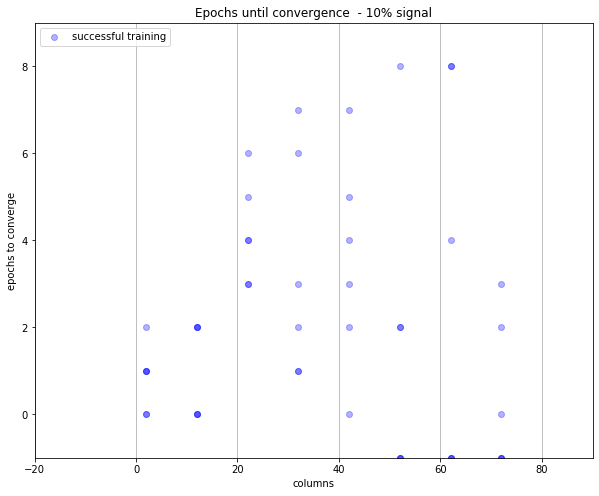

In [24]:
fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(*zip(*(results7_zoom)), color = 'blue', label = 'successful training', alpha = 0.3)

ax.legend(loc='upper left')
ax.set_title('Epochs until convergence  - 10% signal')
ax.set_xlabel('columns')
ax.set_ylabel('epochs to converge')
ax.set_xlim((-20,90))
ax.set_ylim((-1,9))
ax.grid(axis="x", which = 'both')
plt.show()

# task 8

In [1]:
int(1.8)

1

In [2]:
signalz = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]

In [3]:
lst = []
i = 2
while len(lst) < 50:
    i_round = int(i)
    if i_round not in lst:
        lst.append(i_round)
    i = i * 1.1

In [4]:
dim_lst = lst
dim_lst

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 19,
 21,
 23,
 26,
 28,
 31,
 34,
 38,
 42,
 46,
 51,
 56,
 61,
 68,
 74,
 82,
 90,
 99,
 109,
 120,
 132,
 145,
 160,
 176,
 194,
 213,
 234,
 258,
 284,
 312,
 343,
 378,
 415,
 457,
 503]

In [5]:
all_results = {}
all_point_of_fail = {}

In [6]:
def get_random_datapoint_t8(sig,prob, size = 2000, ):
    pts = np.random.normal(0.5, 0.05, size)
    if sig and (np.random.random() < prob):
        pts[0] = np.random.normal(0.6, 0.05, 1)
    return pts


In [7]:
hidden_sizes_t8 = [100, 50]
batch_size_t8 = 100
MAX_EPOCHS = 20


In [8]:
def prep_data_t8(sig, bg):
    
    this_y_bg = np.zeros(len(bg))
    
    this_y_sig = np.ones(len(sig))
    
    """
    Shuffle + Train-Val-Test Split 
    """
    # Combine both data sets
    this_X = np.concatenate([bg, sig])
    this_y = np.concatenate([this_y_bg, this_y_sig])
    
    # Shuffle before we split
    this_X, this_y = shuffle(this_X, this_y)
    
    
    (X_train, X_val, _,
     y_train, y_val, _) = data_split(this_X, this_y, val=0.2, test=0)
        
    X_val = np.ones(X_val.shape) * 0.5
    X_val[:,0] = 0.5 + 0.1*y_val
    
    # change Y to categorical Matrix
    Y_train = to_categorical(y_train, num_classes=2)
    Y_val = to_categorical(y_val, num_classes=2)
    
#     print('Training set size, distribution:')
#     print(X_train.shape)
#     print(np.unique(y_train,return_counts = True))
#     print('Validations set size, distribution:')
#     print(X_val.shape)
#     print(np.unique(y_val,return_counts = True))
    
    return X_train, X_val, Y_train,Y_val



In [12]:
for sig_ratio in signalz:
    mock_signal_t8 = np.array([get_random_datapoint_t8(True, sig_ratio) for _ in range(20000)])
    mock_bg_t8 = np.array([get_random_datapoint_t8(False, sig_ratio) for _ in range(20000)])
    
    this_result = []
    
    X_train_t8, X_val_t8, Y_train_t8,Y_val_t8 = prep_data_t8(mock_signal_t8, mock_bg_t8)
    
    print(f"sig ratio is {sig_ratio}")
    
    for dimension in dim_lst:
        print(f"dim is {dimension}")
        passed = False
        
        for trial in tqdm(range(7)):


            Xtrain, Xval = X_train_t8[:,:dimension], X_val_t8[:,:dimension]
            Ytrain, Yval = Y_train_t8,Y_val_t8

            inputs = tf.keras.Input(shape=(dimension,))
            x = inputs
            for size in hidden_sizes_t8:
                x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)

            outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

            model = tf.keras.Model(inputs=inputs, outputs=outputs)

            model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001),
                      loss=tf.losses.softmax_cross_entropy,
                      metrics=['accuracy'])

            train_acc = 0
            val_acc = 0
            success = 0
            for epoch in range(MAX_EPOCHS):
    #             print(f" {epoch} ", end='')
                history = model.fit(Xtrain, Ytrain,
                      epochs=1,
                      batch_size=batch_size_t8,
                      validation_data=(Xval, Yval),
                      verbose=0)
                train_acc = model.evaluate(Xtrain, Ytrain, verbose = 0)[1]
                val_acc = model.evaluate(Xval, Yval, verbose = 0)[1]
                if (val_acc >= 0.6):
                    success = 1
                    this_result.append([dimension,epoch])
                    break
            if success:
                passed = True
                
            else:
                this_result.append([dimension,-1])
        if passed == False:
            all_point_of_fail[sig_ratio] = dimension
            break
    all_results[sig_ratio] = this_result
    print(this_result)

sig ratio is 0.001
dim is 2


  0%|          | 0/7 [03:45<?, ?it/s]


InternalError: Blas GEMM launch failed : a.shape=(100, 2), b.shape=(2, 100), m=100, n=100, k=2
	 [[{{node dense/MatMul}} = MatMul[T=DT_FLOAT, _class=["loc:@training/Adam/gradients/dense/MatMul_grad/MatMul_1"], transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_input_1_0_0/_61, dense/MatMul/ReadVariableOp)]]

In [1]:
for sig_ratio in signalz[1:]:
    mock_signal_t8 = np.array([get_random_datapoint_t8(True, sig_ratio) for _ in range(20000)])
    mock_bg_t8 = np.array([get_random_datapoint_t8(False, sig_ratio) for _ in range(20000)])
    
    this_result = []
    
    print(f"sig ratio is {sig_ratio}")
    
    for dimension in dim_lst:
        print(f"dim is {dimension}")
        passed = False
        
        for trial in tqdm(range(7)):


            Xtrain, Xval = X_train_t7[:,:dimension], X_val_t7[:,:dimension]
            Ytrain, Yval = Y_train_t7,Y_val_t7

            inputs = tf.keras.Input(shape=(dimension,))
            x = inputs
            for size in hidden_sizes_t7:
                x = tf.keras.layers.Dense(size, activation=tf.nn.relu)(x)

            outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

            model = tf.keras.Model(inputs=inputs, outputs=outputs)

            model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001),
                      loss=tf.losses.softmax_cross_entropy,
                      metrics=['accuracy'])

            train_acc = 0
            val_acc = 0
            success = 0
            for epoch in range(MAX_EPOCHS):
    #             print(f" {epoch} ", end='')
                history = model.fit(Xtrain, Ytrain,
                      epochs=1,
                      batch_size=batch_size_t7,
                      validation_data=(Xval, Yval),
                      verbose=0)
                train_acc = model.evaluate(Xtrain, Ytrain, verbose = 0)[1]
                val_acc = model.evaluate(Xval, Yval, verbose = 0)[1]
                if (val_acc >= 0.65):
                    success = 1
                    this_result.append([dimension,epoch])
                    break
            
            if success:
                passed = True
                
                
            else:
                this_result.append([dimension,-1])
        if passed == False:
            all_point_of_fail[sig_ratio] = dimension
            break
    all_results[sig_ratio] = this_result
    print(this_result)

NameError: name 'signalz' is not defined